In [1]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()


Saving test.csv to test.csv


In [2]:
import os

# List all files in the /content directory to verify upload
print("Files in /content directory:")
print(os.listdir('/content'))


Files in /content directory:
['.config', 'test.csv', 'sample_data']


Files in /content directory:
['.config', 'test.csv', 'sample_data']
First Five Rows of the Dataset:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09,180363630.0,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00,881000000.0,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00,854400000.0,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.66,600000000.0,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00,850400000.0,...,0,0,2,1,0,0,0,0,Normal,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  

<ipython-input-3-412e7779a866>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette={'0':'skyblue', '1':'salmon'})


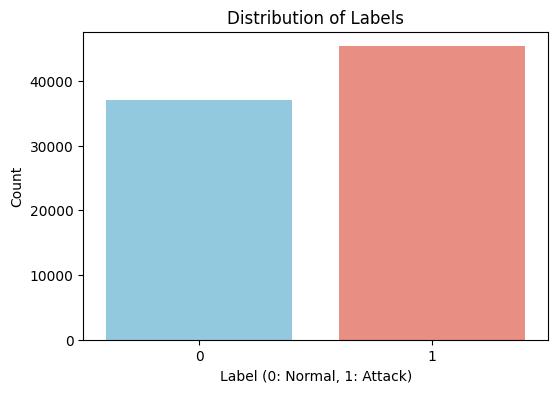

<ipython-input-3-412e7779a866>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='attack_cat', data=df, palette='magma')


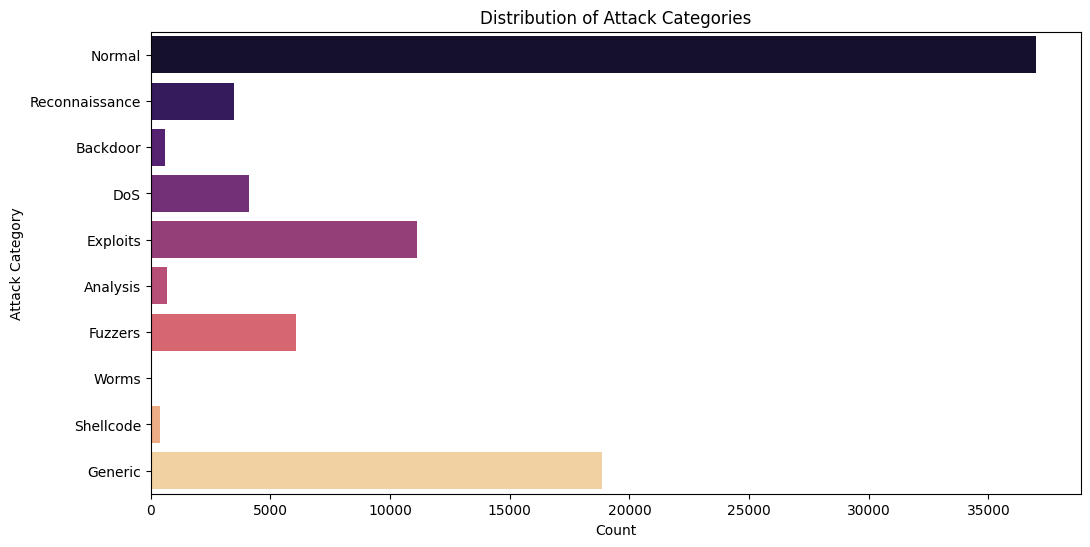


Unique Threat Types:
['Signature-Based' 'Anomaly-Based']


<ipython-input-3-412e7779a866>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='threat_type', data=df, palette={'Signature-Based':'blue', 'Anomaly-Based':'orange'})


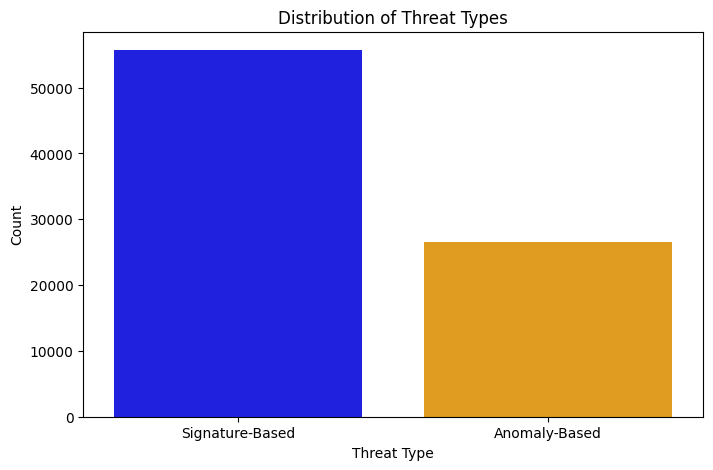

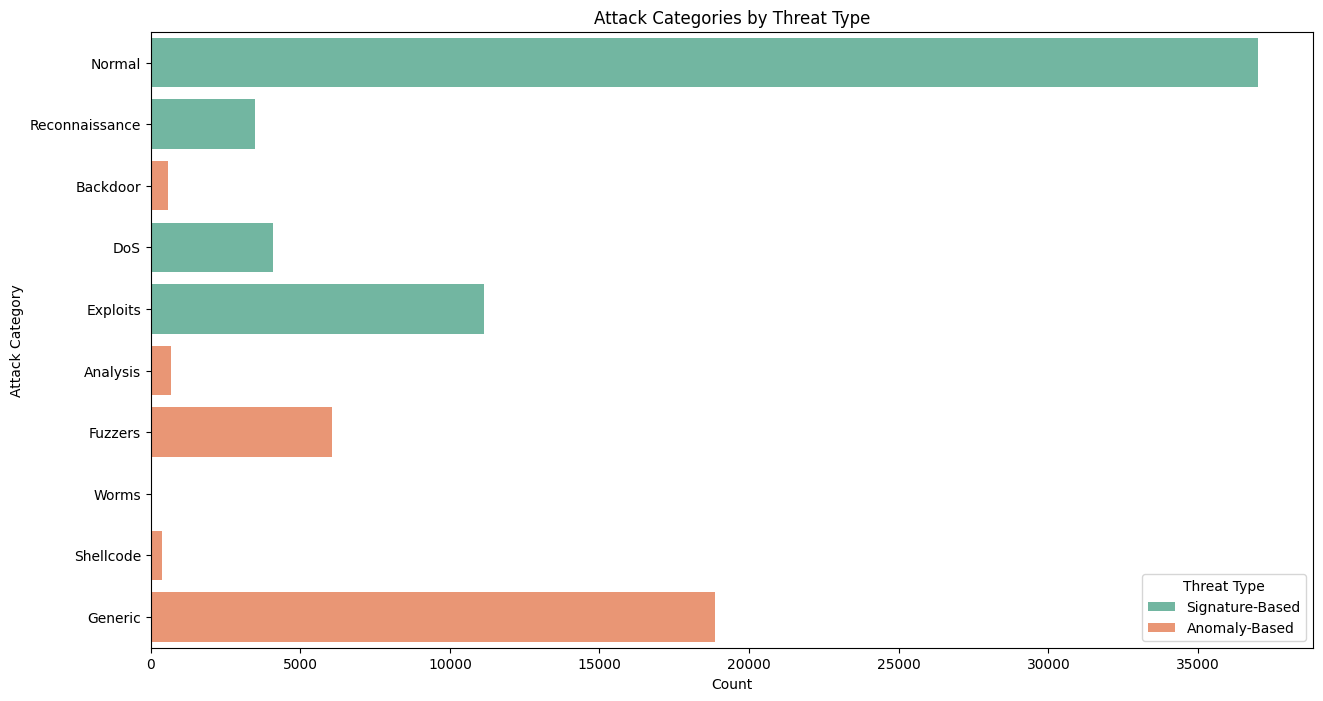

In [3]:
# Phase 1: Data Loading and Initial Exploration

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

# Step 1: Upload the Dataset (Only if not already in /content/)
# Uncomment the following lines if you need to upload the dataset
# uploaded = files.upload()

# Step 2: Verify the File Upload
print("Files in /content directory:")
print(os.listdir('/content'))

# Step 3: Load Dataset with Correct Path (including space)
df = pd.read_csv('/content/test.csv')

# Display First Five Rows
print("First Five Rows of the Dataset:")
display(df.head())

# Dataset Information
print("\nDataset Information:")
print(df.info())

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Distribution of Labels
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette={'0':'skyblue', '1':'salmon'})
plt.title('Distribution of Labels')
plt.xlabel('Label (0: Normal, 1: Attack)')
plt.ylabel('Count')
plt.show()

# Distribution of Attack Categories
plt.figure(figsize=(12,6))
sns.countplot(y='attack_cat', data=df, palette='magma')
plt.title('Distribution of Attack Categories')
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.show()

# Mapping Attack Categories to Threat Types
signature_based_attacks = [
    'Normal', 'Exploits', 'DoS', 'DDoS', 'Reconnaissance', 'Web Attack',
    'Botnet', 'SQL Injection', 'XSS', 'Brute Force'
]

# Function to categorize threats into Signature-Based or Anomaly-Based
def categorize_threat(attack_cat):
    if attack_cat in signature_based_attacks:
        return 'Signature-Based'
    else:
        return 'Anomaly-Based'

# Apply the categorization
df['threat_type'] = df['attack_cat'].apply(categorize_threat)

# Verify the Mapping
print("\nUnique Threat Types:")
print(df['threat_type'].unique())

# Encode the new 'threat_type' column for visualization
threat_type_mapping = {'Signature-Based': 0, 'Anomaly-Based': 1}
df['threat_type_encoded'] = df['threat_type'].map(threat_type_mapping)

# Distribution of Threat Types
plt.figure(figsize=(8,5))
sns.countplot(x='threat_type', data=df, palette={'Signature-Based':'blue', 'Anomaly-Based':'orange'})
plt.title('Distribution of Threat Types')
plt.xlabel('Threat Type')
plt.ylabel('Count')
plt.show()

# Bar Plot of Attack Categories within Threat Types
plt.figure(figsize=(15,8))
sns.countplot(y='attack_cat', hue='threat_type', data=df, palette='Set2')
plt.title('Attack Categories by Threat Type')
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.legend(title='Threat Type')
plt.show()



Missing Values Before Imputation:
dur                    0
proto                  0
service                0
state                  0
spkts                  0
dpkts                  0
sbytes                 0
dbytes                 0
rate                   0
sload                  0
dload                  0
sloss                  0
dloss                  0
sinpkt                 0
dinpkt                 0
sjit                   0
djit                   0
swin                   0
stcpb                  0
dtcpb                  0
dwin                   0
tcprtt                 0
synack                 0
ackdat                 0
smean                  0
dmean                  0
trans_depth            0
response_body_len      0
ct_src_dport_ltm       0
ct_dst_sport_ltm       0
is_ftp_login           0
ct_ftp_cmd             0
ct_flw_http_mthd       0
is_sm_ips_ports        0
attack_cat             0
label                  0
threat_type            0
threat_type_encoded    0
dtype: int64

M

<ipython-input-4-5700b812d3e4>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette={'0':'skyblue', '1':'salmon'})


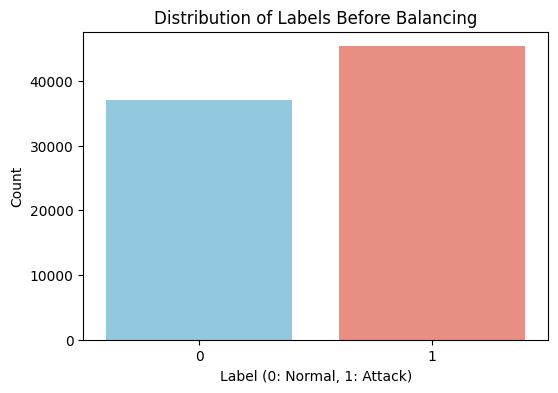

<ipython-input-4-5700b812d3e4>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette={'0':'skyblue', '1':'salmon'})


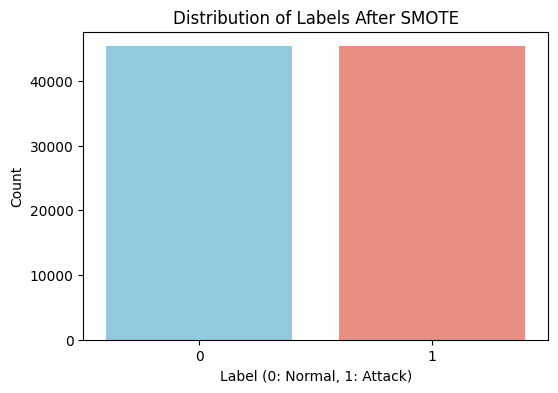


Final Feature Set Shape: (90664, 35)
Final Target Set Shape: (90664,)


In [4]:
# Phase 2: Data Preprocessing and Feature Engineering

# Import Necessary Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Handling Missing Values
# Check for missing values
print("\nMissing Values Before Imputation:")
print(df.isnull().sum())

# Handle missing values if any
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# 2. Encoding Categorical Features
# Identify categorical columns
categorical_cols = ['proto', 'service', 'state', 'is_ftp_login',
                    'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# Verify encoding
print("\nEncoded Categorical Features:")
print(df[categorical_cols].head())

# 3. Feature Scaling
# Identify numerical columns (excluding the target variable 'label')
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'label' in numerical_cols:
    numerical_cols.remove('label')  # Exclude label
if 'threat_type_encoded' in numerical_cols:
    numerical_cols.remove('threat_type_encoded')  # Exclude encoded threat_type if not needed

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify scaling
print("\nScaled Numerical Features:")
print(df[numerical_cols].head())

# 4. Mapping Attack Categories to Threat Types
# Already categorized in Phase 1, ensuring consistency
# The 'threat_type_encoded' column already exists

# 5. Addressing Class Imbalance
# Check the distribution of the target variable 'label'
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette={'0':'skyblue', '1':'salmon'})
plt.title('Distribution of Labels Before Balancing')
plt.xlabel('Label (0: Normal, 1: Attack)')
plt.ylabel('Count')
plt.show()

# Separate features and target
X = df.drop(['label', 'attack_cat', 'threat_type'], axis=1)
y = df['label']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verify the new distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_res, palette={'0':'skyblue', '1':'salmon'})
plt.title('Distribution of Labels After SMOTE')
plt.xlabel('Label (0: Normal, 1: Attack)')
plt.ylabel('Count')
plt.show()

# 6. Preparing Data for Modeling
# Final feature set
X_final = X_res
y_final = y_res

print("\nFinal Feature Set Shape:", X_final.shape)
print("Final Target Set Shape:", y_final.shape)

# Optionally, save the preprocessed data for future use
# X_final.to_csv('/content/X_final.csv', index=False)
# y_final.to_csv('/content/y_final.csv', index=False)


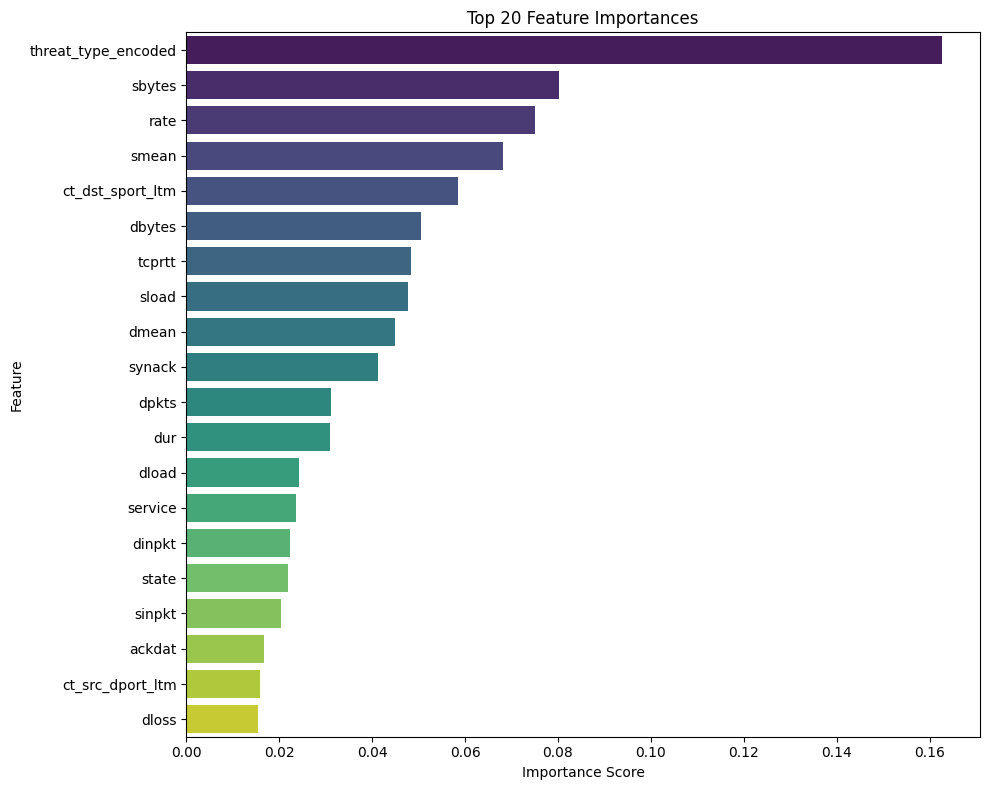

Selected Top 10 Features by RFE:
['dur', 'sbytes', 'dbytes', 'rate', 'sload', 'tcprtt', 'synack', 'smean', 'ct_dst_sport_ltm', 'threat_type_encoded']


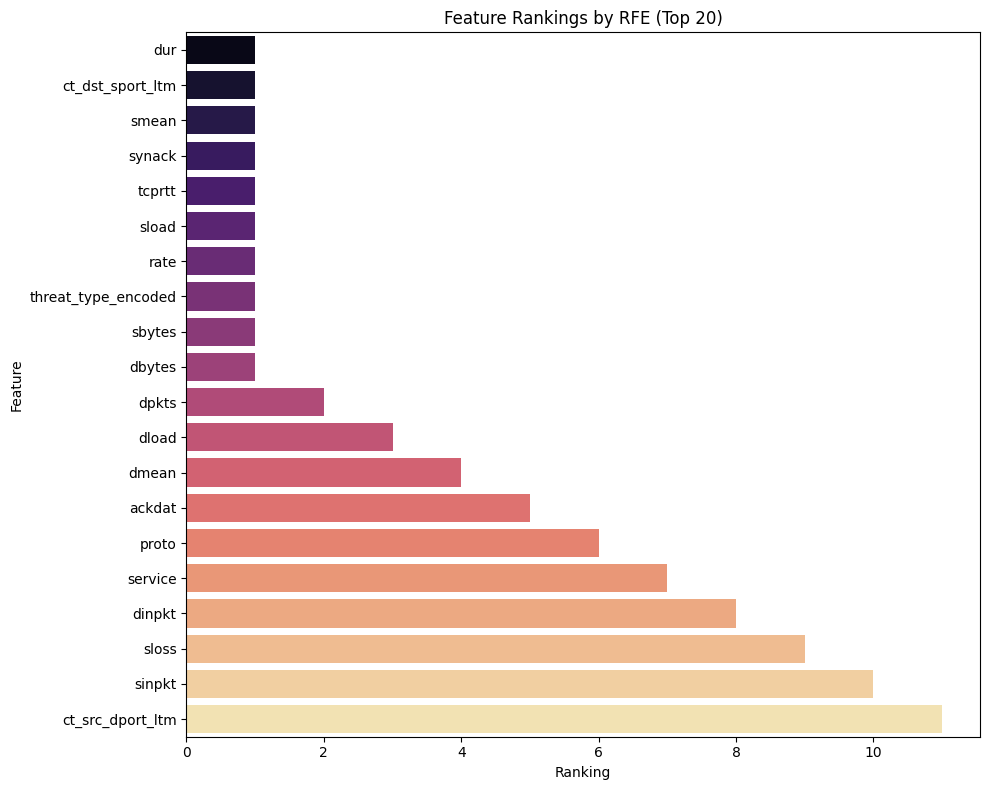

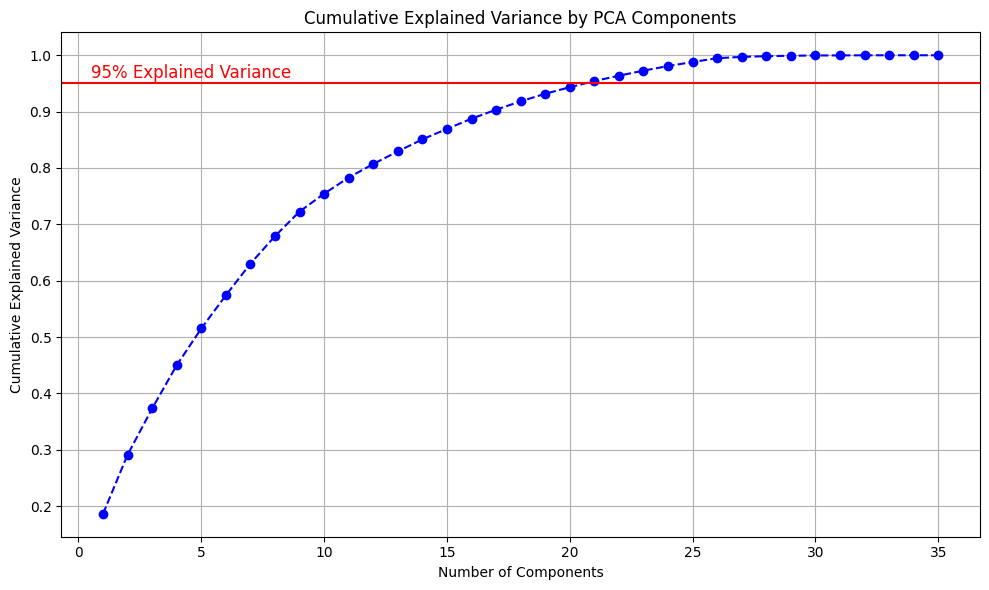

Number of PCA components to retain 95.0% variance: 21

Explained Variance Ratio by Each Principal Component:
PC1: 0.1864
PC2: 0.1048
PC3: 0.0820
PC4: 0.0768
PC5: 0.0651
PC6: 0.0589
PC7: 0.0561
PC8: 0.0489
PC9: 0.0436
PC10: 0.0316
PC11: 0.0287
PC12: 0.0241
PC13: 0.0223
PC14: 0.0213
PC15: 0.0186
PC16: 0.0181
PC17: 0.0159
PC18: 0.0149
PC19: 0.0134
PC20: 0.0116
PC21: 0.0109

### Feature Selection and Dimensionality Reduction Summary ###
Selected Features by RFE (Top 10):
['dur', 'sbytes', 'dbytes', 'rate', 'sload', 'tcprtt', 'synack', 'smean', 'ct_dst_sport_ltm', 'threat_type_encoded']

Number of PCA Components Retained: 21

Feature Selection and Dimensionality Reduction completed successfully.


In [5]:
# Phase 3: Feature Selection and Dimensionality Reduction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Feature Importance Analysis using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_final, y_final)
importances = rf.feature_importances_
features = X_final.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 20
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
n_features_to_select = 10
rfe = RFE(estimator, n_features_to_select=n_features_to_select)
rfe.fit(X_final, y_final)
selected_features = X_final.columns[rfe.support_]
print(f"Selected Top {n_features_to_select} Features by RFE:")
print(selected_features.tolist())

ranking = rfe.ranking_
rfe_ranking_df = pd.DataFrame({'Feature': X_final.columns, 'Ranking': ranking})
rfe_ranking_df = rfe_ranking_df.sort_values(by='Ranking')

plt.figure(figsize=(10,8))
sns.barplot(x='Ranking', y='Feature', data=rfe_ranking_df.head(top_n), palette='magma')
plt.title(f'Feature Rankings by RFE (Top {top_n})')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.96, '95% Explained Variance', color='red', fontsize=12)
plt.tight_layout()
plt.show()

desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"Number of PCA components to retain {desired_variance*100}% variance: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
pca_columns = [f'PC{i}' for i in range(1, n_components+1)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio by Each Principal Component:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")

# Feature Selection Summary
print("\n### Feature Selection and Dimensionality Reduction Summary ###")
print(f"Selected Features by RFE (Top {n_features_to_select}):")
print(selected_features.tolist())
print(f"\nNumber of PCA Components Retained: {n_components}")

# Optionally, use only RFE selected features
X_selected = X_final[selected_features]

# Optionally, use only PCA components
X_reduced = X_pca_df

# Optionally, combine both
# X_combined = pd.concat([X_selected.reset_index(drop=True), X_pca_df], axis=1)

print("\nFeature Selection and Dimensionality Reduction completed successfully.")


In [6]:
# Install necessary packages
!pip install catboost dask[dataframe] --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 19.0 MB/s eta 0:00:00


In [7]:
# Phase 4: Model Development with Regularization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Traditional Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


In [8]:
# Assuming X_selected and y_final are already defined from Phase 3
X = X_selected  # Using RFE selected features
y = y_final

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# Define a Function to Evaluate Models
def evaluate_model(y_true, y_pred, y_proba=None, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else 'N/A'

    print(f"\n{model_name} Performance:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"ROC-AUC  : {auc if auc != 'N/A' else 'N/A'}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return {'Model': model_name, 'Accuracy': acc, 'Precision': precision,
            'Recall': recall, 'F1-Score': f1, 'ROC-AUC': auc}

# Initialize Results List
results = []


Training Set Shape: (72531, 10)
Testing Set Shape: (18133, 10)



Training Logistic Regression...

Logistic Regression Performance:
Accuracy : 0.8258
Precision: 0.9603
Recall   : 0.6797
F1-Score : 0.7960
ROC-AUC  : 0.8817835779045282


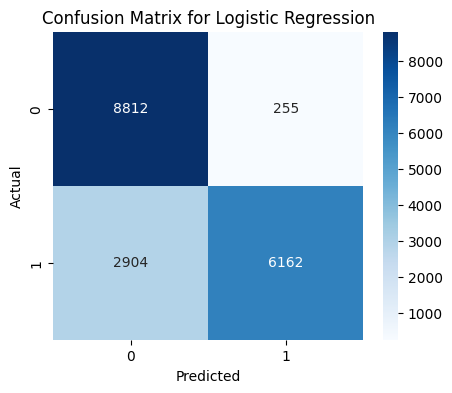


Training Support Vector Machine...

Support Vector Machine Performance:
Accuracy : 0.9134
Precision: 0.9592
Recall   : 0.8636
F1-Score : 0.9089
ROC-AUC  : 0.9534153314282081


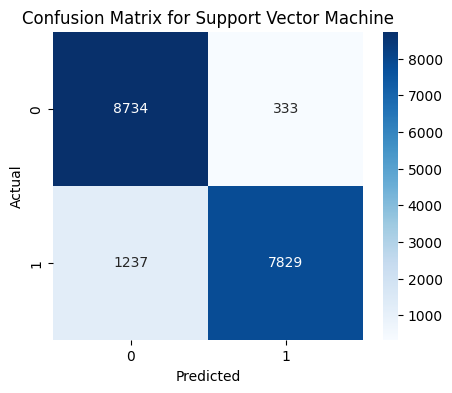


Training K-Nearest Neighbors...

K-Nearest Neighbors Performance:
Accuracy : 0.9446
Precision: 0.9644
Recall   : 0.9233
F1-Score : 0.9434
ROC-AUC  : 0.980085295848045


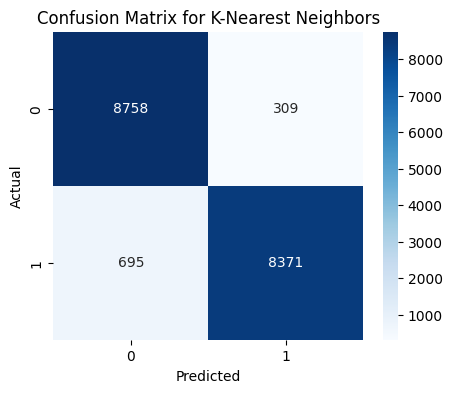


Training Gradient Boosting Classifier...

Gradient Boosting Classifier Performance:
Accuracy : 0.9656
Precision: 0.9860
Recall   : 0.9447
F1-Score : 0.9649
ROC-AUC  : 0.9932668622204612


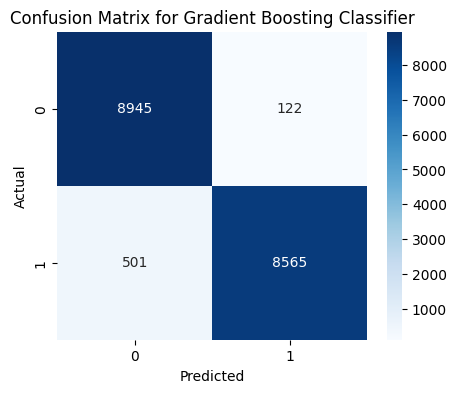

In [9]:
# 1. Logistic Regression
print("\nTraining Logistic Regression...")
log_reg = LogisticRegression(random_state=42, max_iter=1000, penalty='l2', solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]
results.append(evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression"))

# 2. Support Vector Machine (SVM)
print("\nTraining Support Vector Machine...")
svm = SVC(random_state=42, probability=True, kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:,1]
results.append(evaluate_model(y_test, y_pred_svm, y_proba_svm, "Support Vector Machine"))

# 3. K-Nearest Neighbors (KNN)
print("\nTraining K-Nearest Neighbors...")
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:,1]
results.append(evaluate_model(y_test, y_pred_knn, y_proba_knn, "K-Nearest Neighbors"))

# 4. Gradient Boosting Classifier
print("\nTraining Gradient Boosting Classifier...")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:,1]
results.append(evaluate_model(y_test, y_pred_gb, y_proba_gb, "Gradient Boosting Classifier"))


Training Artificial Neural Network (ANN)...
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Artificial Neural Network Performance:
Accuracy : 0.9342
Precision: 0.9828
Recall   : 0.8837
F1-Score : 0.9307
ROC-AUC  : 0.9810621706763175


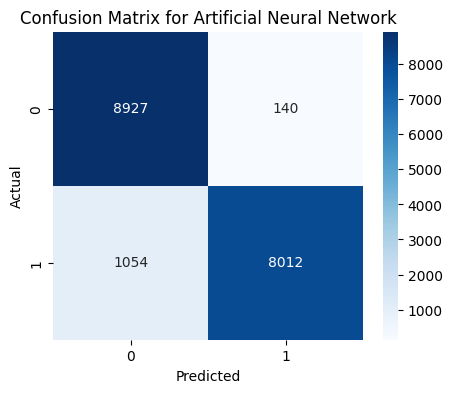

In [10]:
# ------------------- Deep Learning Models -------------------

# 1. Artificial Neural Network (ANN)
print("\nTraining Artificial Neural Network (ANN)...")

ann_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

ann_history = ann_model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

# Predict and Evaluate ANN
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int).flatten()
y_proba_ann = ann_model.predict(X_test).flatten()
results.append(evaluate_model(y_test, y_pred_ann, y_proba_ann, "Artificial Neural Network"))





567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

ANN Performance:
Accuracy : 0.9403
Precision: 0.9724
Recall   : 0.9064
F1-Score : 0.9382
ROC-AUC  : 0.9835


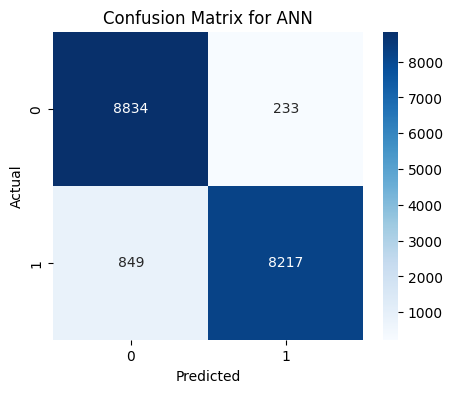

In [11]:
# a. Artificial Neural Network (ANN)
ann_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the ANN model
history = ann_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

# Evaluate ANN
y_ann_pred = (ann_model.predict(X_test) > 0.5).astype(int).flatten()
acc = accuracy_score(y_test, y_ann_pred)
precision = precision_score(y_test, y_ann_pred, zero_division=0)
recall = recall_score(y_test, y_ann_pred, zero_division=0)
f1 = f1_score(y_test, y_ann_pred, zero_division=0)
auc = roc_auc_score(y_test, ann_model.predict(X_test).flatten())

print("\nANN Performance:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")

# Confusion Matrix for ANN
cm = confusion_matrix(y_test, y_ann_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

results.append({'Model': 'ANN', 'Accuracy': acc, 'Precision': precision,
               'Recall': recall, 'F1-Score': f1, 'ROC-AUC': auc})


In [12]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM



Training Convolutional Neural Network (CNN)...
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Convolutional Neural Network Performance:
Accuracy : 0.9425
Precision: 0.9696
Recall   : 0.9137
F1-Score : 0.9408
ROC-AUC  : 0.9855137481684926


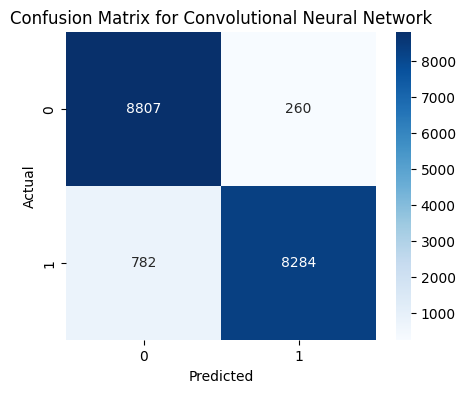

In [13]:
# 2. Convolutional Neural Network (CNN) for Tabular Data
print("\nTraining Convolutional Neural Network (CNN)...")

# Reshape data for CNN: (samples, features, channels)
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

early_stop_cnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop_cnn],
    verbose=0
)

# Predict and Evaluate CNN
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()
y_proba_cnn = cnn_model.predict(X_test_cnn).flatten()
results.append(evaluate_model(y_test, y_pred_cnn, y_proba_cnn, "Convolutional Neural Network"))


Training Long Short-Term Memory (LSTM) Network...
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Long Short-Term Memory Network Performance:
Accuracy : 0.9458
Precision: 0.9786
Recall   : 0.9115
F1-Score : 0.9439
ROC-AUC  : 0.9868824288708777


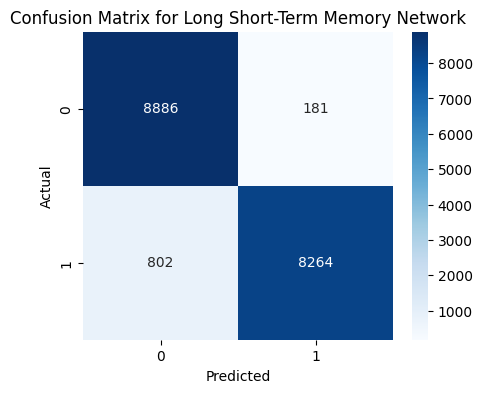

In [14]:
# 3. Long Short-Term Memory (LSTM) Network
print("\nTraining Long Short-Term Memory (LSTM) Network...")

# Reshape data for LSTM: (samples, timesteps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stop_lstm = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop_lstm],
    verbose=0
)

# Predict and Evaluate LSTM
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()
y_proba_lstm = lstm_model.predict(X_test_lstm).flatten()
results.append(evaluate_model(y_test, y_pred_lstm, y_proba_lstm, "Long Short-Term Memory Network"))


Model Performance Comparison:
                            Model  Accuracy  Precision    Recall  F1-Score  \
0             Logistic Regression  0.825787   0.960262  0.679682  0.795970   
1          Support Vector Machine  0.913418   0.959201  0.863556  0.908869   
2             K-Nearest Neighbors  0.944631   0.964401  0.923340  0.943424   
3    Gradient Boosting Classifier  0.965643   0.985956  0.944739  0.964907   
4       Artificial Neural Network  0.934153   0.982826  0.883741  0.930654   
5                             ANN  0.940330   0.972426  0.906353  0.938228   
6    Convolutional Neural Network  0.942536   0.969569  0.913744  0.940829   
7  Long Short-Term Memory Network  0.945789   0.978567  0.911538  0.943864   

    ROC-AUC  
0  0.881784  
1  0.953415  
2  0.980085  
3  0.993267  
4  0.981062  
5  0.983478  
6  0.985514  
7  0.986882  


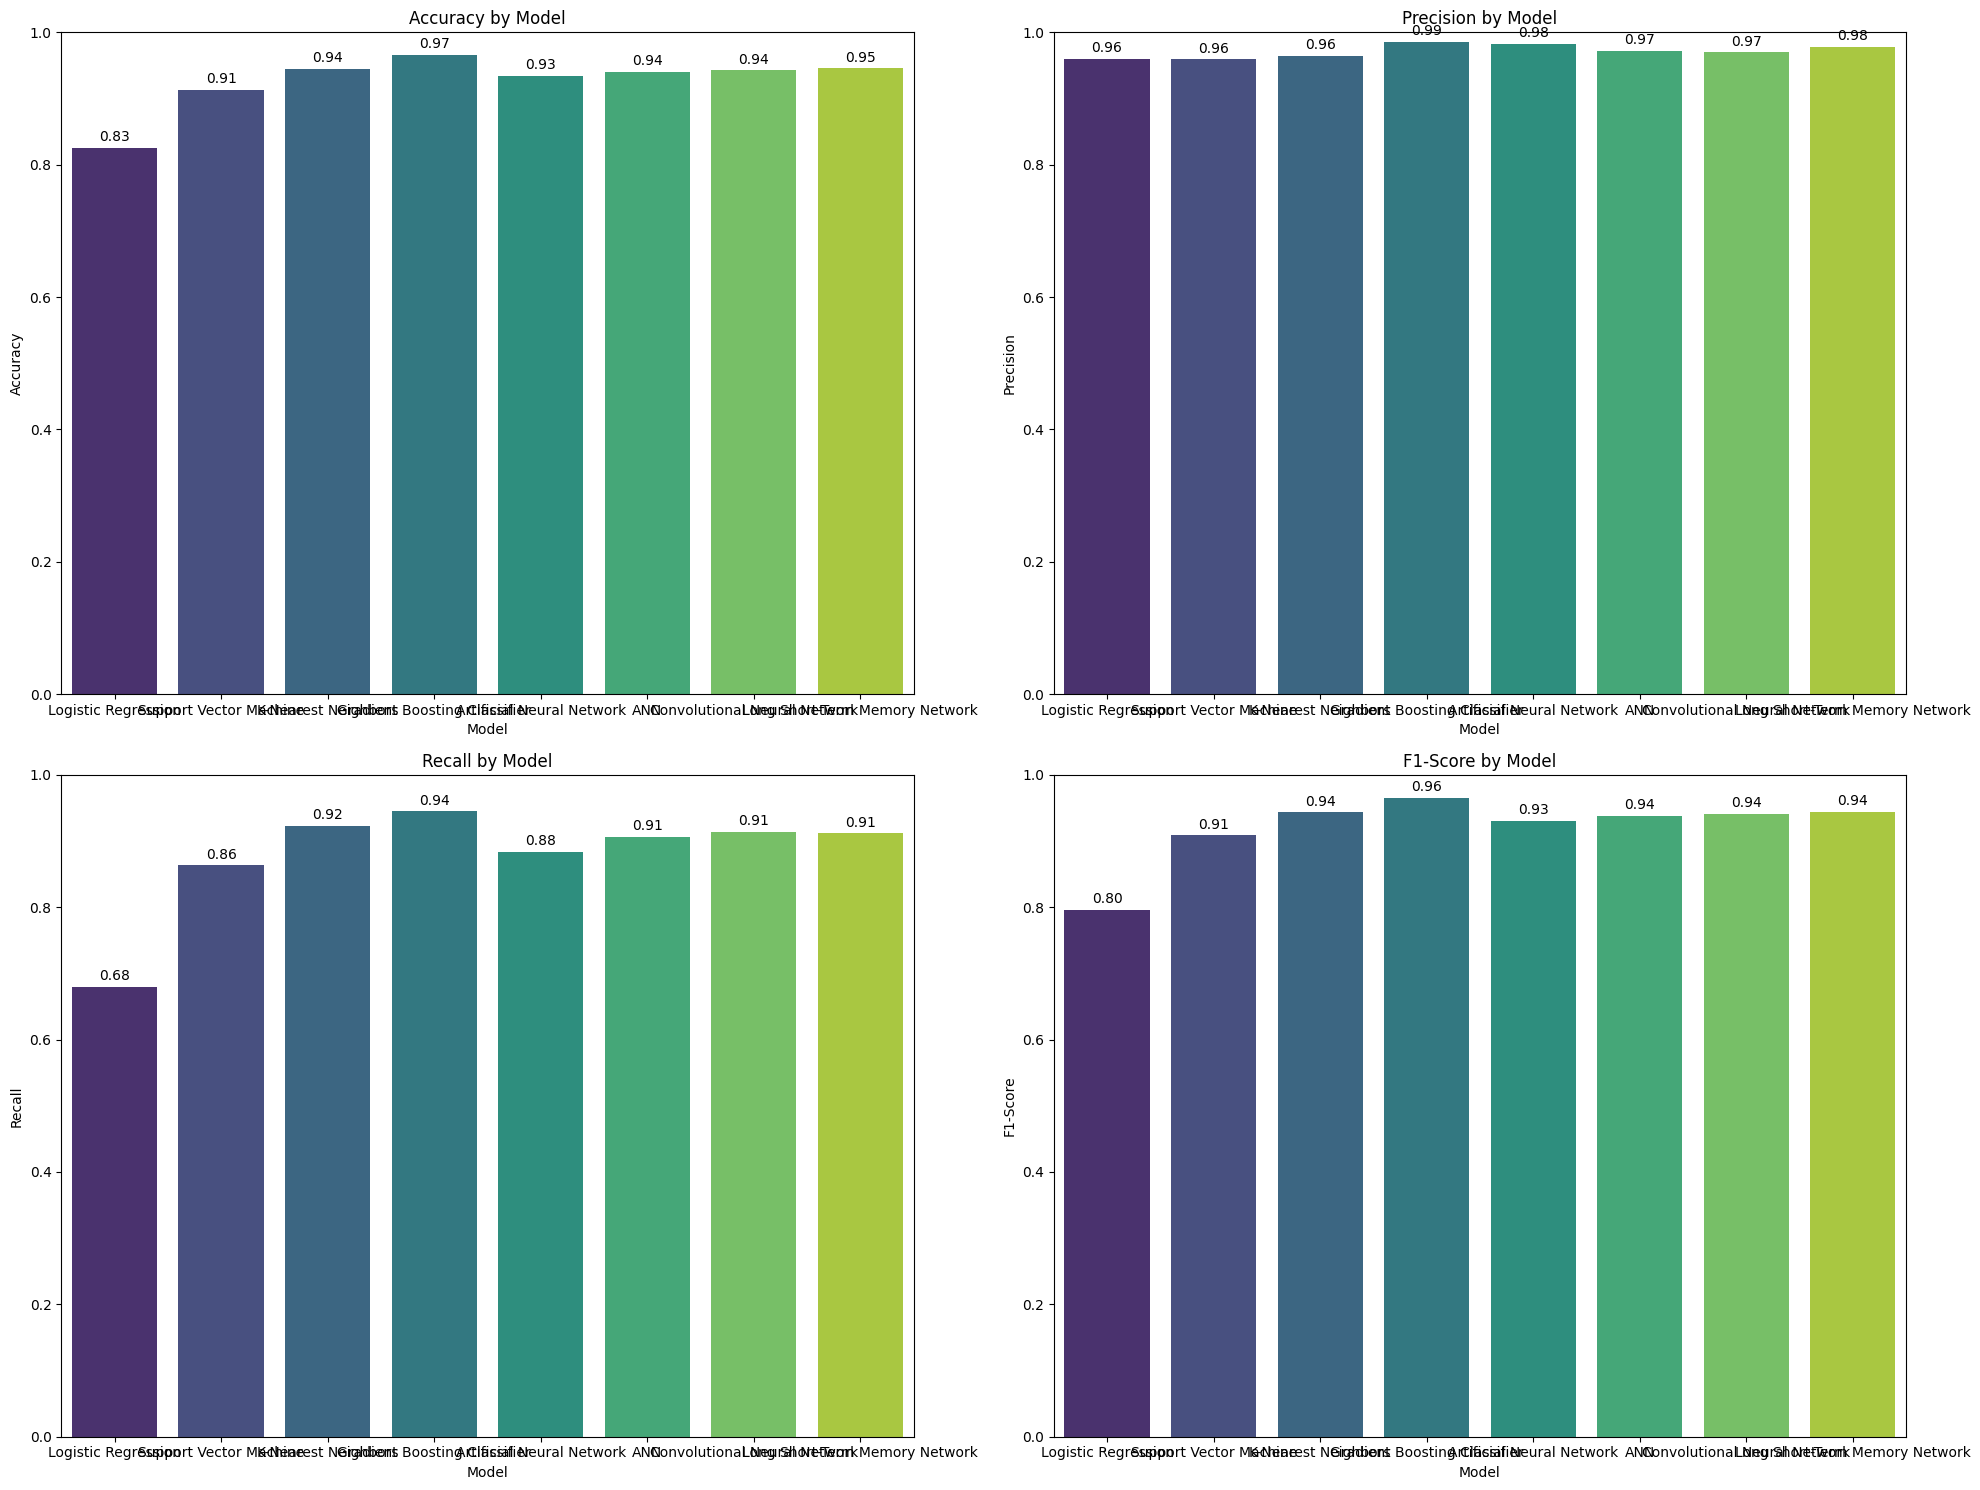

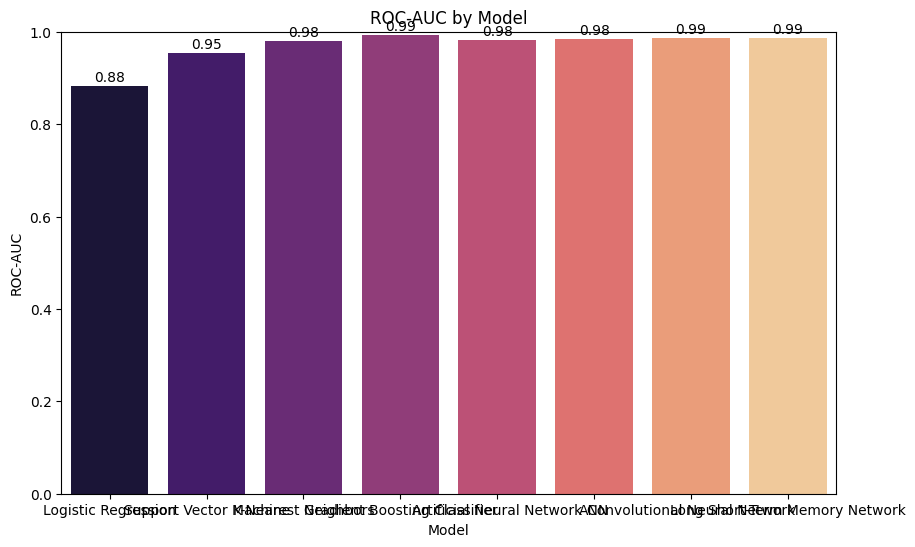

In [15]:
# ------------------- Summary of Results -------------------

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("\nModel Performance Comparison:")
print(results_df)

# Bar Plot for Accuracy, Precision, Recall, F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(20,15))
for idx, metric in enumerate(metrics):
    plt.subplot(2, 2, idx+1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'{metric} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0,1)
    for index, row in results_df.iterrows():
        plt.text(index, row[metric] + 0.01, f"{row[metric]:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Bar Plot for ROC-AUC
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='ROC-AUC', data=results_df, palette='magma')
plt.title('ROC-AUC by Model')
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.ylim(0,1)
for index, row in results_df.iterrows():
    if row['ROC-AUC'] != 'N/A':
        plt.text(index, row['ROC-AUC'] + 0.01, f"{row['ROC-AUC']:.2f}", ha='center')
plt.show()


### Compiling Model Predictions ###
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

### Plotting ROC Curves ###


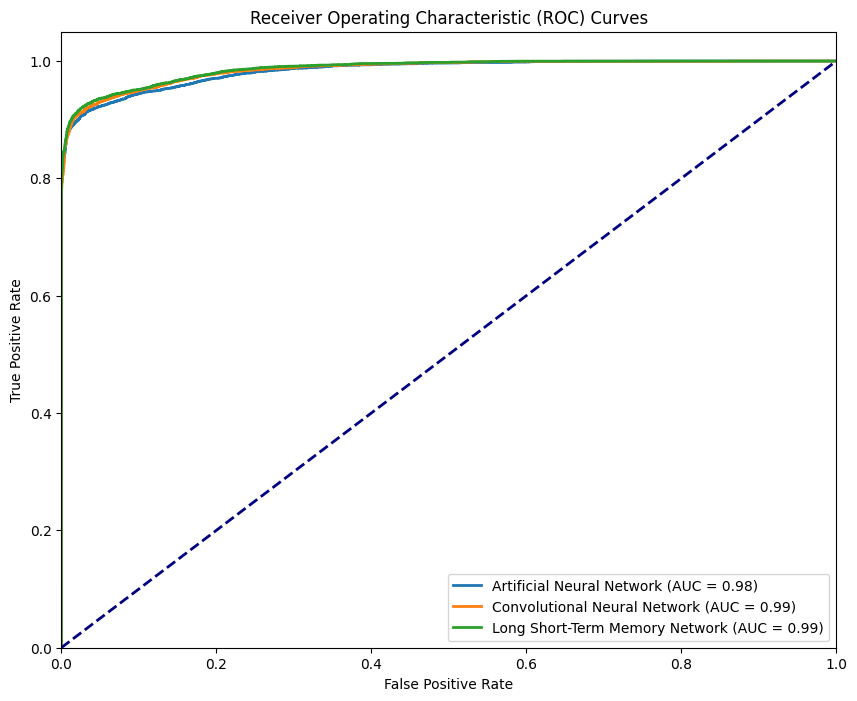


### Plotting Precision-Recall Curves ###


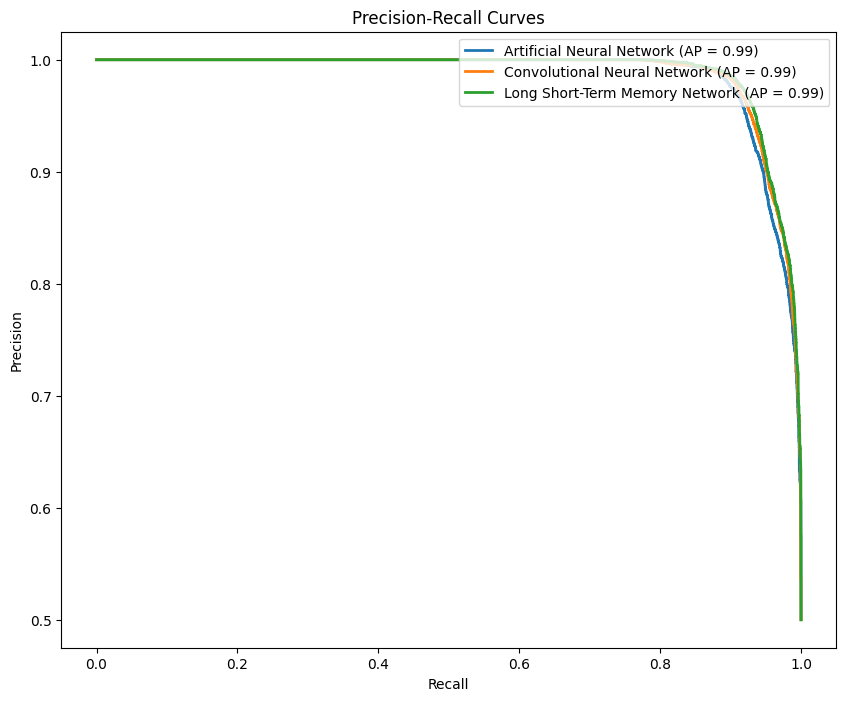


### Plotting Training and Validation Metrics ###


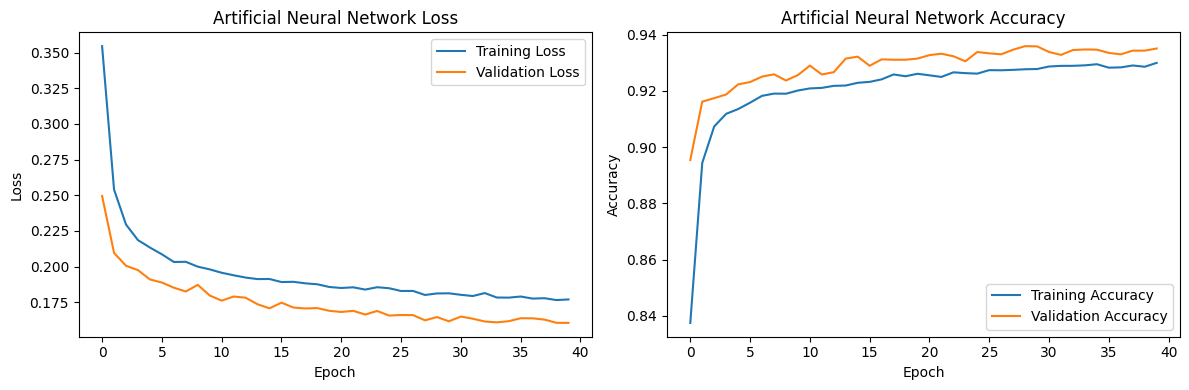

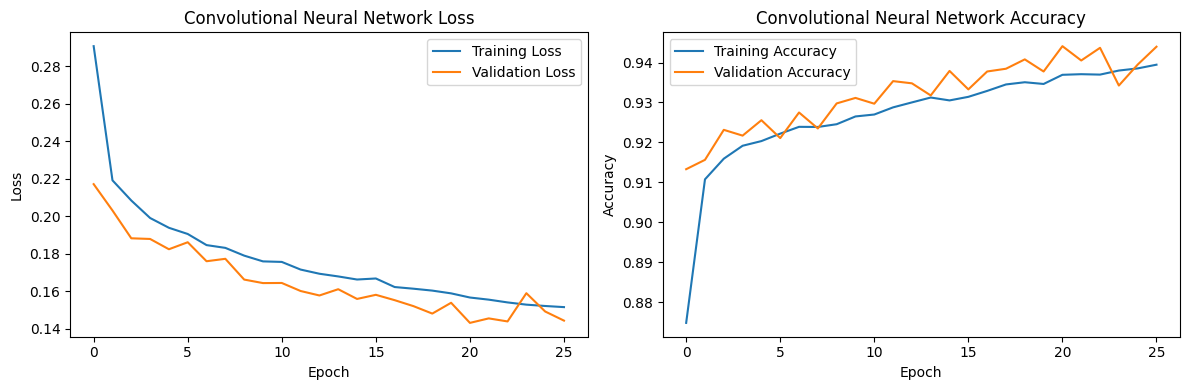

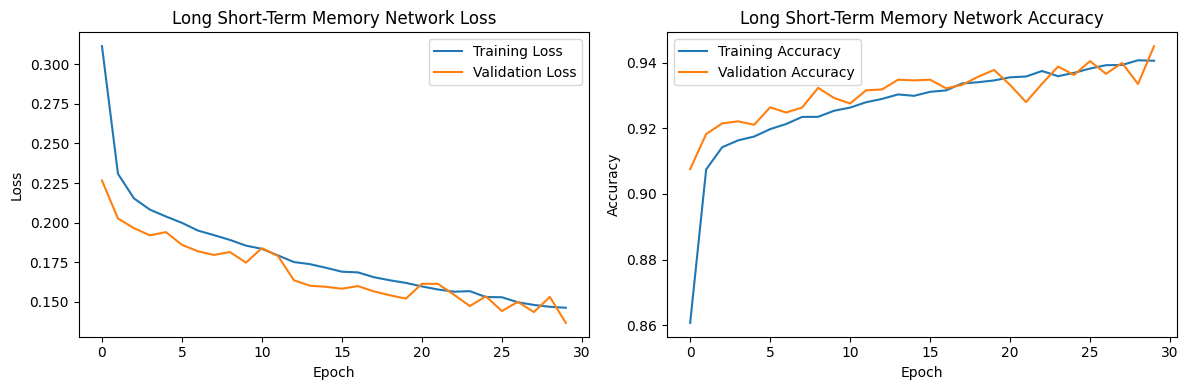


### Summarizing Model Performances ###

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.825787,0.960262,0.679682,0.795970,0.881784
1,Support Vector Machine,0.913418,0.959201,0.863556,0.908869,0.953415
2,K-Nearest Neighbors,0.944631,0.964401,0.923340,0.943424,0.980085
3,Gradient Boosting Classifier,0.965643,0.985956,0.944739,0.964907,0.993267
4,Artificial Neural Network,0.934153,0.982826,0.883741,0.930654,0.981062
5,ANN,0.940330,0.972426,0.906353,0.938228,0.983478
6,Convolutional Neural Network,0.942536,0.969569,0.913744,0.940829,0.985514
7,Long Short-Term Memory Network,0.945789,0.978567,0.911538,0.943864,0.986882
8,Artificial Neural Network,0.940330,0.972426,0.906353,0.938228,0.983478
9,Convolutional Neural Network,0.942536,0.969569,0.913744,0.940829,0.985514



### Visual Comparison of Model Metrics ###


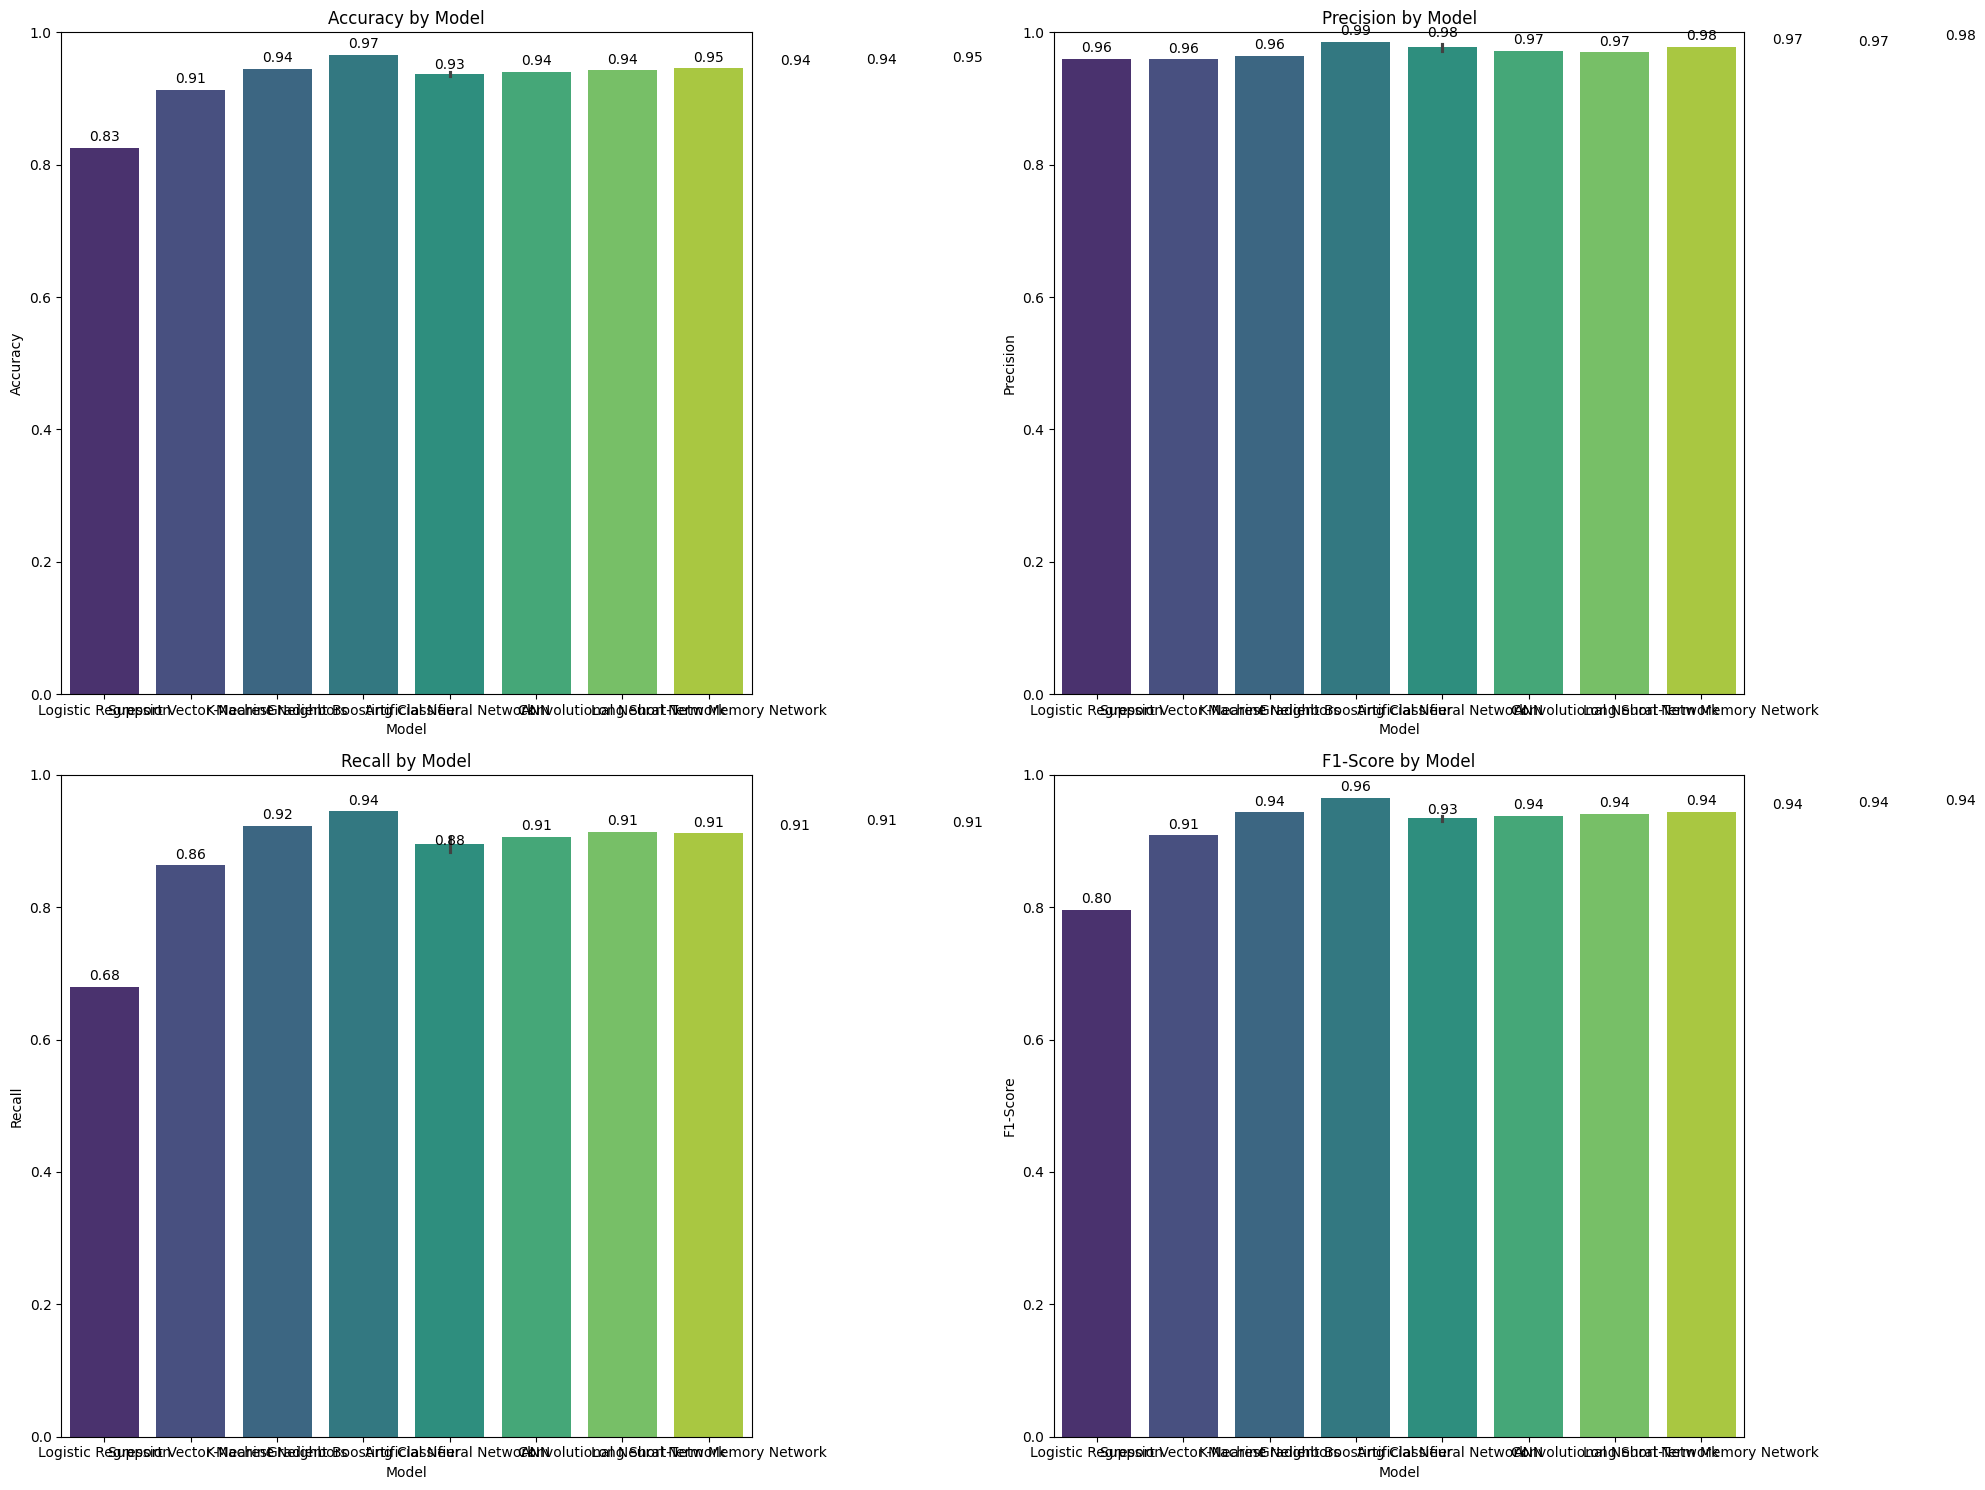

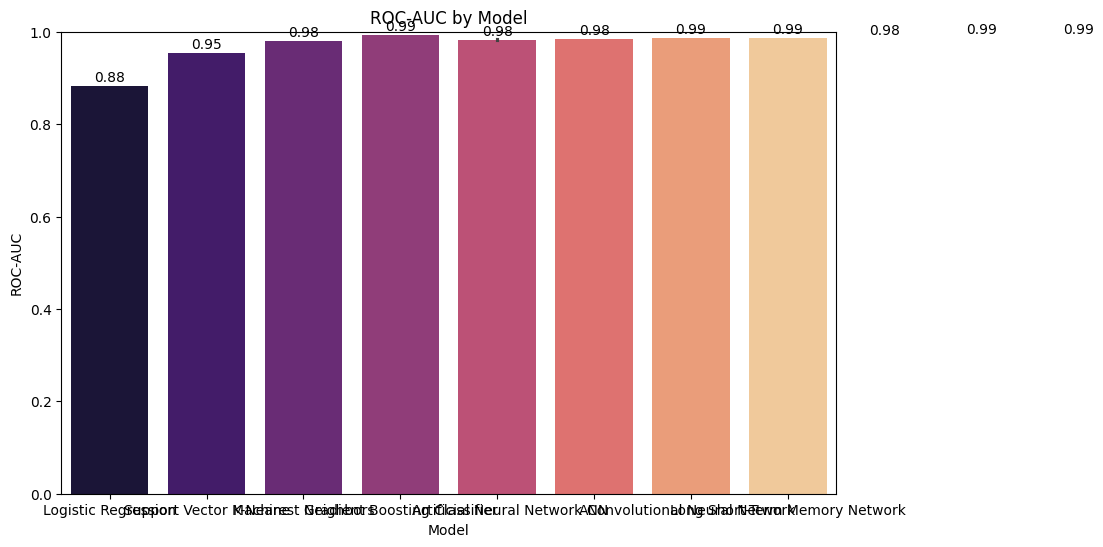

In [16]:
# Phase 6: Model Evaluation and Validation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# ------------------- 1. Compile Model Predictions -------------------

print("\n### Compiling Model Predictions ###")

# Assuming 'results' list and trained models ('ann_model', 'cnn_model', 'lstm_model') are available from Phase 4

# Predictions and probabilities for ANN
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int).flatten()
y_proba_ann = ann_model.predict(X_test).flatten()

# Predictions and probabilities for CNN
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()
y_proba_cnn = cnn_model.predict(X_test_cnn).flatten()

# Predictions and probabilities for LSTM
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()
y_proba_lstm = lstm_model.predict(X_test_lstm).flatten()

# Store predictions in a dictionary for easy access
model_predictions = {
    "Artificial Neural Network": {
        "y_pred": y_pred_ann,
        "y_proba": y_proba_ann
    },
    "Convolutional Neural Network": {
        "y_pred": y_pred_cnn,
        "y_proba": y_proba_cnn
    },
    "Long Short-Term Memory Network": {
        "y_pred": y_pred_lstm,
        "y_proba": y_proba_lstm
    }
}

# ------------------- 2. Plot ROC Curves for All Models -------------------

print("\n### Plotting ROC Curves ###")

plt.figure(figsize=(10,8))

for model_name, preds in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, preds["y_proba"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# If you have traditional models' probabilities, include them here
# Example:
# fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
# roc_auc_lr = auc(fpr_lr, tpr_lr)
# plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# ------------------- 3. Plot Precision-Recall Curves for All Models -------------------

print("\n### Plotting Precision-Recall Curves ###")

plt.figure(figsize=(10,8))

for model_name, preds in model_predictions.items():
    precision, recall, _ = precision_recall_curve(y_test, preds["y_proba"])
    avg_precision = average_precision_score(y_test, preds["y_proba"])
    plt.plot(recall, precision, lw=2, label=f'{model_name} (AP = {avg_precision:.2f})')

# If you have traditional models' precision-recall, include them here
# Example:
# precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
# avg_precision_lr = average_precision_score(y_test, y_proba_lr)
# plt.plot(recall_lr, precision_lr, lw=2, label=f'Logistic Regression (AP = {avg_precision_lr:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="upper right")
plt.show()

# ------------------- 4. Plot Training and Validation Metrics for Deep Learning Models -------------------

print("\n### Plotting Training and Validation Metrics ###")

# Function to plot training history
def plot_training_history(history, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Plot Loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title(f'{model_name} Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot Accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title(f'{model_name} Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Plot for ANN
plot_training_history(ann_history, "Artificial Neural Network")

# Plot for CNN
plot_training_history(cnn_history, "Convolutional Neural Network")

# Plot for LSTM
plot_training_history(lstm_history, "Long Short-Term Memory Network")

# ------------------- 5. Summarize and Compare Model Performances -------------------

print("\n### Summarizing Model Performances ###")

# Create a DataFrame for Deep Learning Models
dl_results = [
    {
        'Model': 'Artificial Neural Network',
        'Accuracy': accuracy_score(y_test, y_pred_ann),
        'Precision': precision_score(y_test, y_pred_ann, zero_division=0),
        'Recall': recall_score(y_test, y_pred_ann, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred_ann, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_proba_ann) if len(np.unique(y_test)) > 1 else 'N/A'
    },
    {
        'Model': 'Convolutional Neural Network',
        'Accuracy': accuracy_score(y_test, y_pred_cnn),
        'Precision': precision_score(y_test, y_pred_cnn, zero_division=0),
        'Recall': recall_score(y_test, y_pred_cnn, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred_cnn, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_proba_cnn) if len(np.unique(y_test)) > 1 else 'N/A'
    },
    {
        'Model': 'Long Short-Term Memory Network',
        'Accuracy': accuracy_score(y_test, y_pred_lstm),
        'Precision': precision_score(y_test, y_pred_lstm, zero_division=0),
        'Recall': recall_score(y_test, y_pred_lstm, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred_lstm, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_proba_lstm) if len(np.unique(y_test)) > 1 else 'N/A'
    }
]

# Assuming 'results_df' contains traditional models' results from Phase 4
# If not, you can manually add them here or adjust accordingly

# Example: If 'results_df' is not defined, create it
try:
    results_df
except NameError:
    results_df = pd.DataFrame()

# Append deep learning results to 'results_df'
dl_results_df = pd.DataFrame(dl_results)
combined_results_df = pd.concat([results_df, dl_results_df], ignore_index=True)

# Display the combined results
print("\nModel Performance Comparison:")
display(combined_results_df)

# ------------------- 6. Visual Comparison of Model Metrics -------------------

print("\n### Visual Comparison of Model Metrics ###")

# Bar Plot for Accuracy, Precision, Recall, F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(20,15))
for idx, metric in enumerate(metrics):
    plt.subplot(2, 2, idx+1)
    sns.barplot(x='Model', y=metric, data=combined_results_df, palette='viridis')
    plt.title(f'{metric} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0,1)
    for index, row in combined_results_df.iterrows():
        plt.text(index, row[metric] + 0.01, f"{row[metric]:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Bar Plot for ROC-AUC
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='ROC-AUC', data=combined_results_df, palette='magma')
plt.title('ROC-AUC by Model')
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.ylim(0,1)
for index, row in combined_results_df.iterrows():
    if row['ROC-AUC'] != 'N/A':
        plt.text(index, row['ROC-AUC'] + 0.01, f"{row['ROC-AUC']:.2f}", ha='center')
plt.show()



### Data Distribution: Signature-based vs Anomaly-based Threats ###


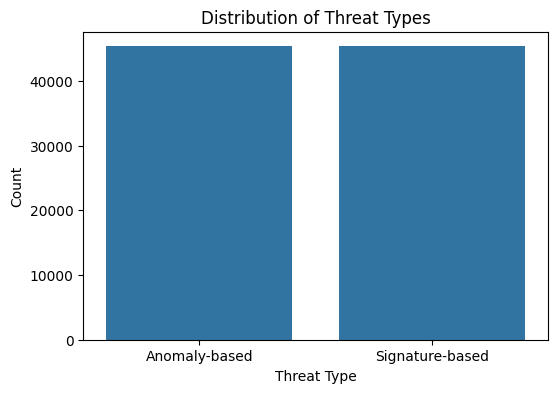


### Compiling Model Predictions ###
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

### Evaluating All Models ###

Artificial Neural Network Performance:
Accuracy : 0.9403
Precision: 0.9724
Recall   : 0.9064
F1-Score : 0.9382
ROC-AUC  : 0.9834779926313197


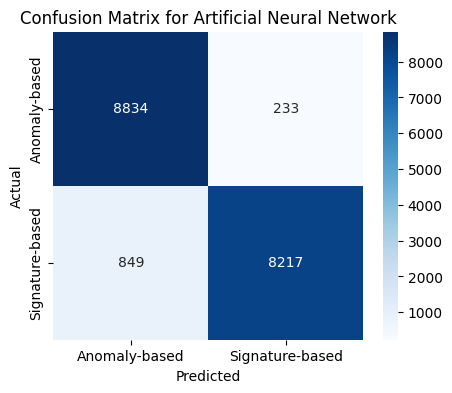


Classification Report for Artificial Neural Network:
                 precision    recall  f1-score   support

  Anomaly-based       0.91      0.97      0.94      9067
Signature-based       0.97      0.91      0.94      9066

       accuracy                           0.94     18133
      macro avg       0.94      0.94      0.94     18133
   weighted avg       0.94      0.94      0.94     18133


Convolutional Neural Network Performance:
Accuracy : 0.9425
Precision: 0.9696
Recall   : 0.9137
F1-Score : 0.9408
ROC-AUC  : 0.9855137481684926


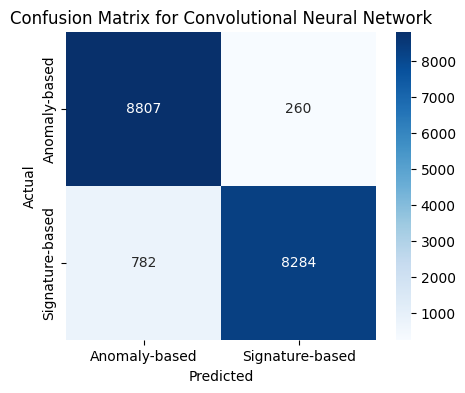


Classification Report for Convolutional Neural Network:
                 precision    recall  f1-score   support

  Anomaly-based       0.92      0.97      0.94      9067
Signature-based       0.97      0.91      0.94      9066

       accuracy                           0.94     18133
      macro avg       0.94      0.94      0.94     18133
   weighted avg       0.94      0.94      0.94     18133


Long Short-Term Memory Network Performance:
Accuracy : 0.9458
Precision: 0.9786
Recall   : 0.9115
F1-Score : 0.9439
ROC-AUC  : 0.9868824288708777


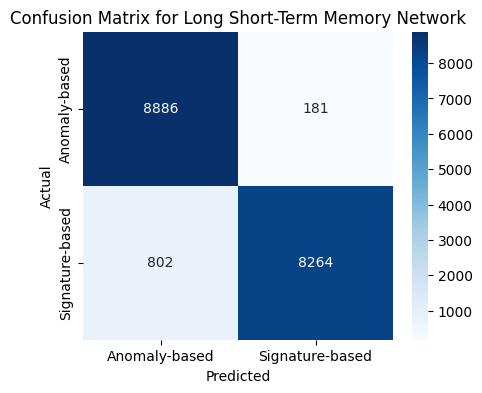


Classification Report for Long Short-Term Memory Network:
                 precision    recall  f1-score   support

  Anomaly-based       0.92      0.98      0.95      9067
Signature-based       0.98      0.91      0.94      9066

       accuracy                           0.95     18133
      macro avg       0.95      0.95      0.95     18133
   weighted avg       0.95      0.95      0.95     18133


### Plotting ROC Curves ###


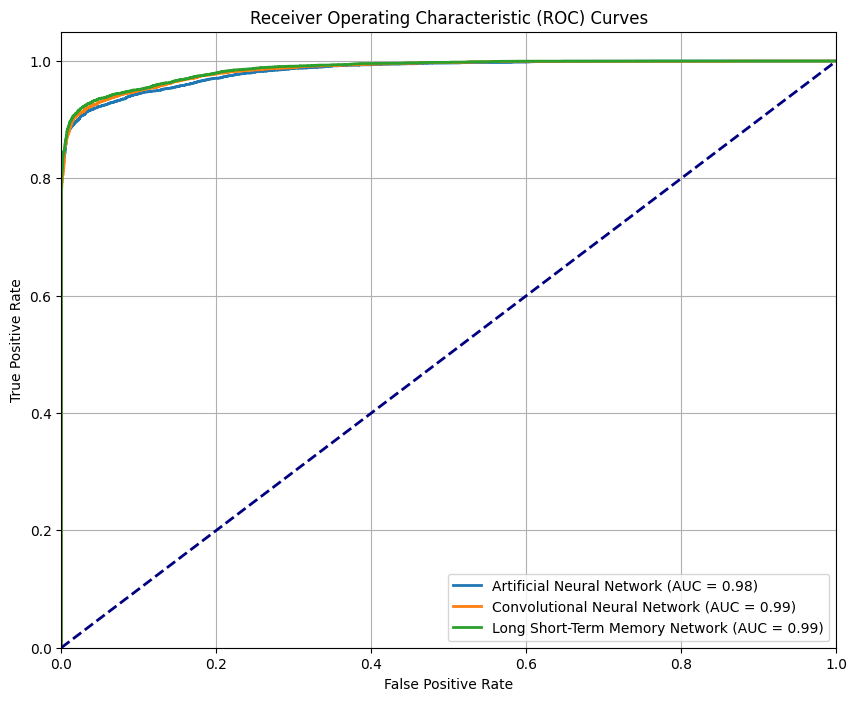


### Plotting Precision-Recall Curves ###


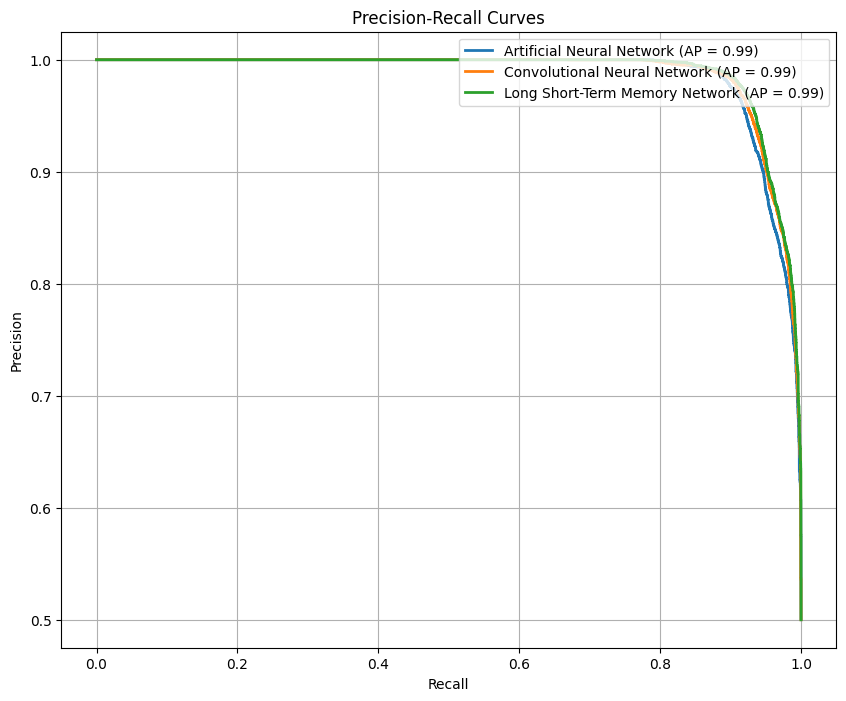


### Plotting Training and Validation Metrics ###


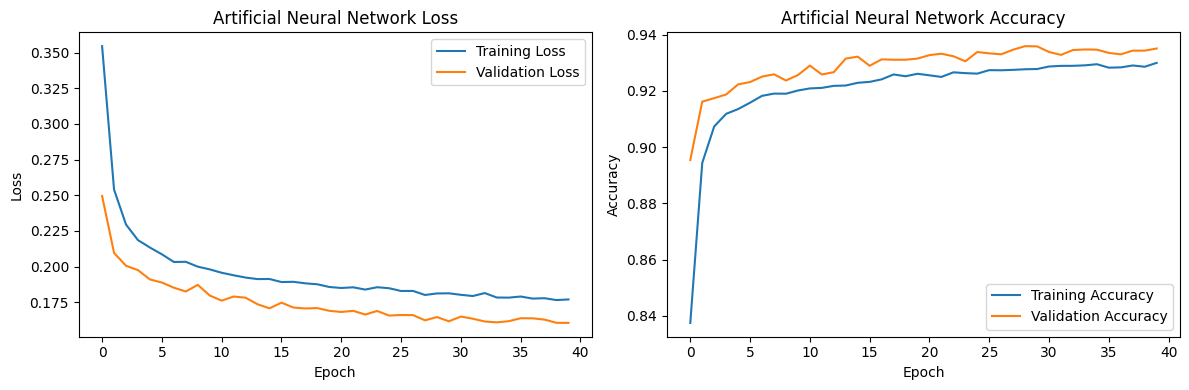

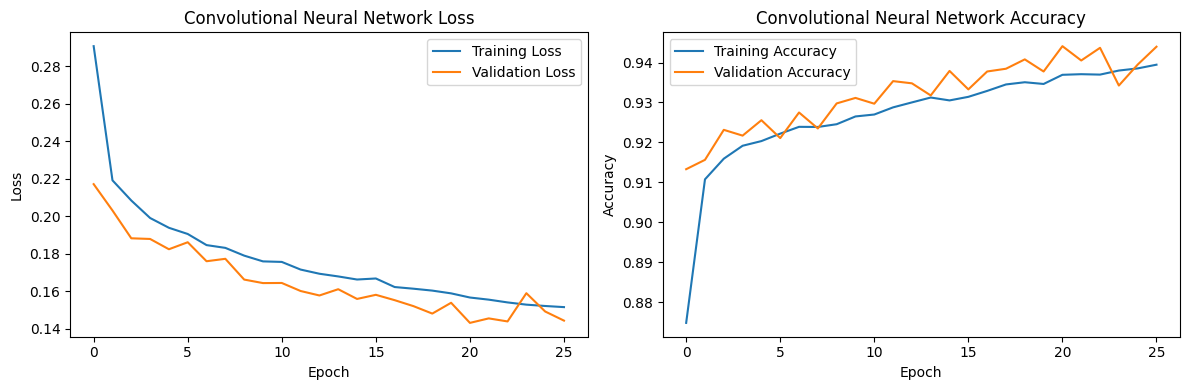

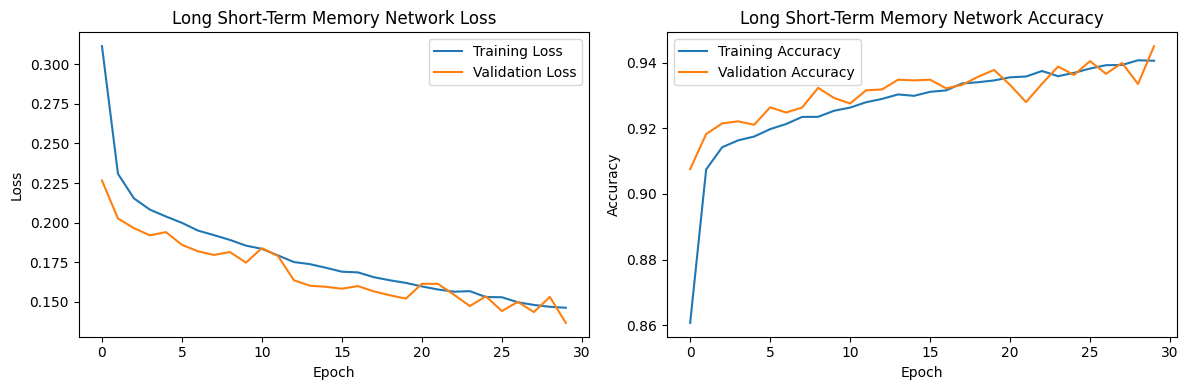


### Summarizing Model Performances ###

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.825787,0.960262,0.679682,0.795970,0.881784
1,Support Vector Machine,0.913418,0.959201,0.863556,0.908869,0.953415
2,K-Nearest Neighbors,0.944631,0.964401,0.923340,0.943424,0.980085
3,Gradient Boosting Classifier,0.965643,0.985956,0.944739,0.964907,0.993267
4,Artificial Neural Network,0.934153,0.982826,0.883741,0.930654,0.981062
5,ANN,0.940330,0.972426,0.906353,0.938228,0.983478
6,Convolutional Neural Network,0.942536,0.969569,0.913744,0.940829,0.985514
7,Long Short-Term Memory Network,0.945789,0.978567,0.911538,0.943864,0.986882
8,Artificial Neural Network,0.940330,0.972426,0.906353,0.938228,0.983478
9,Convolutional Neural Network,0.942536,0.969569,0.913744,0.940829,0.985514



### Visual Comparison of Model Metrics ###


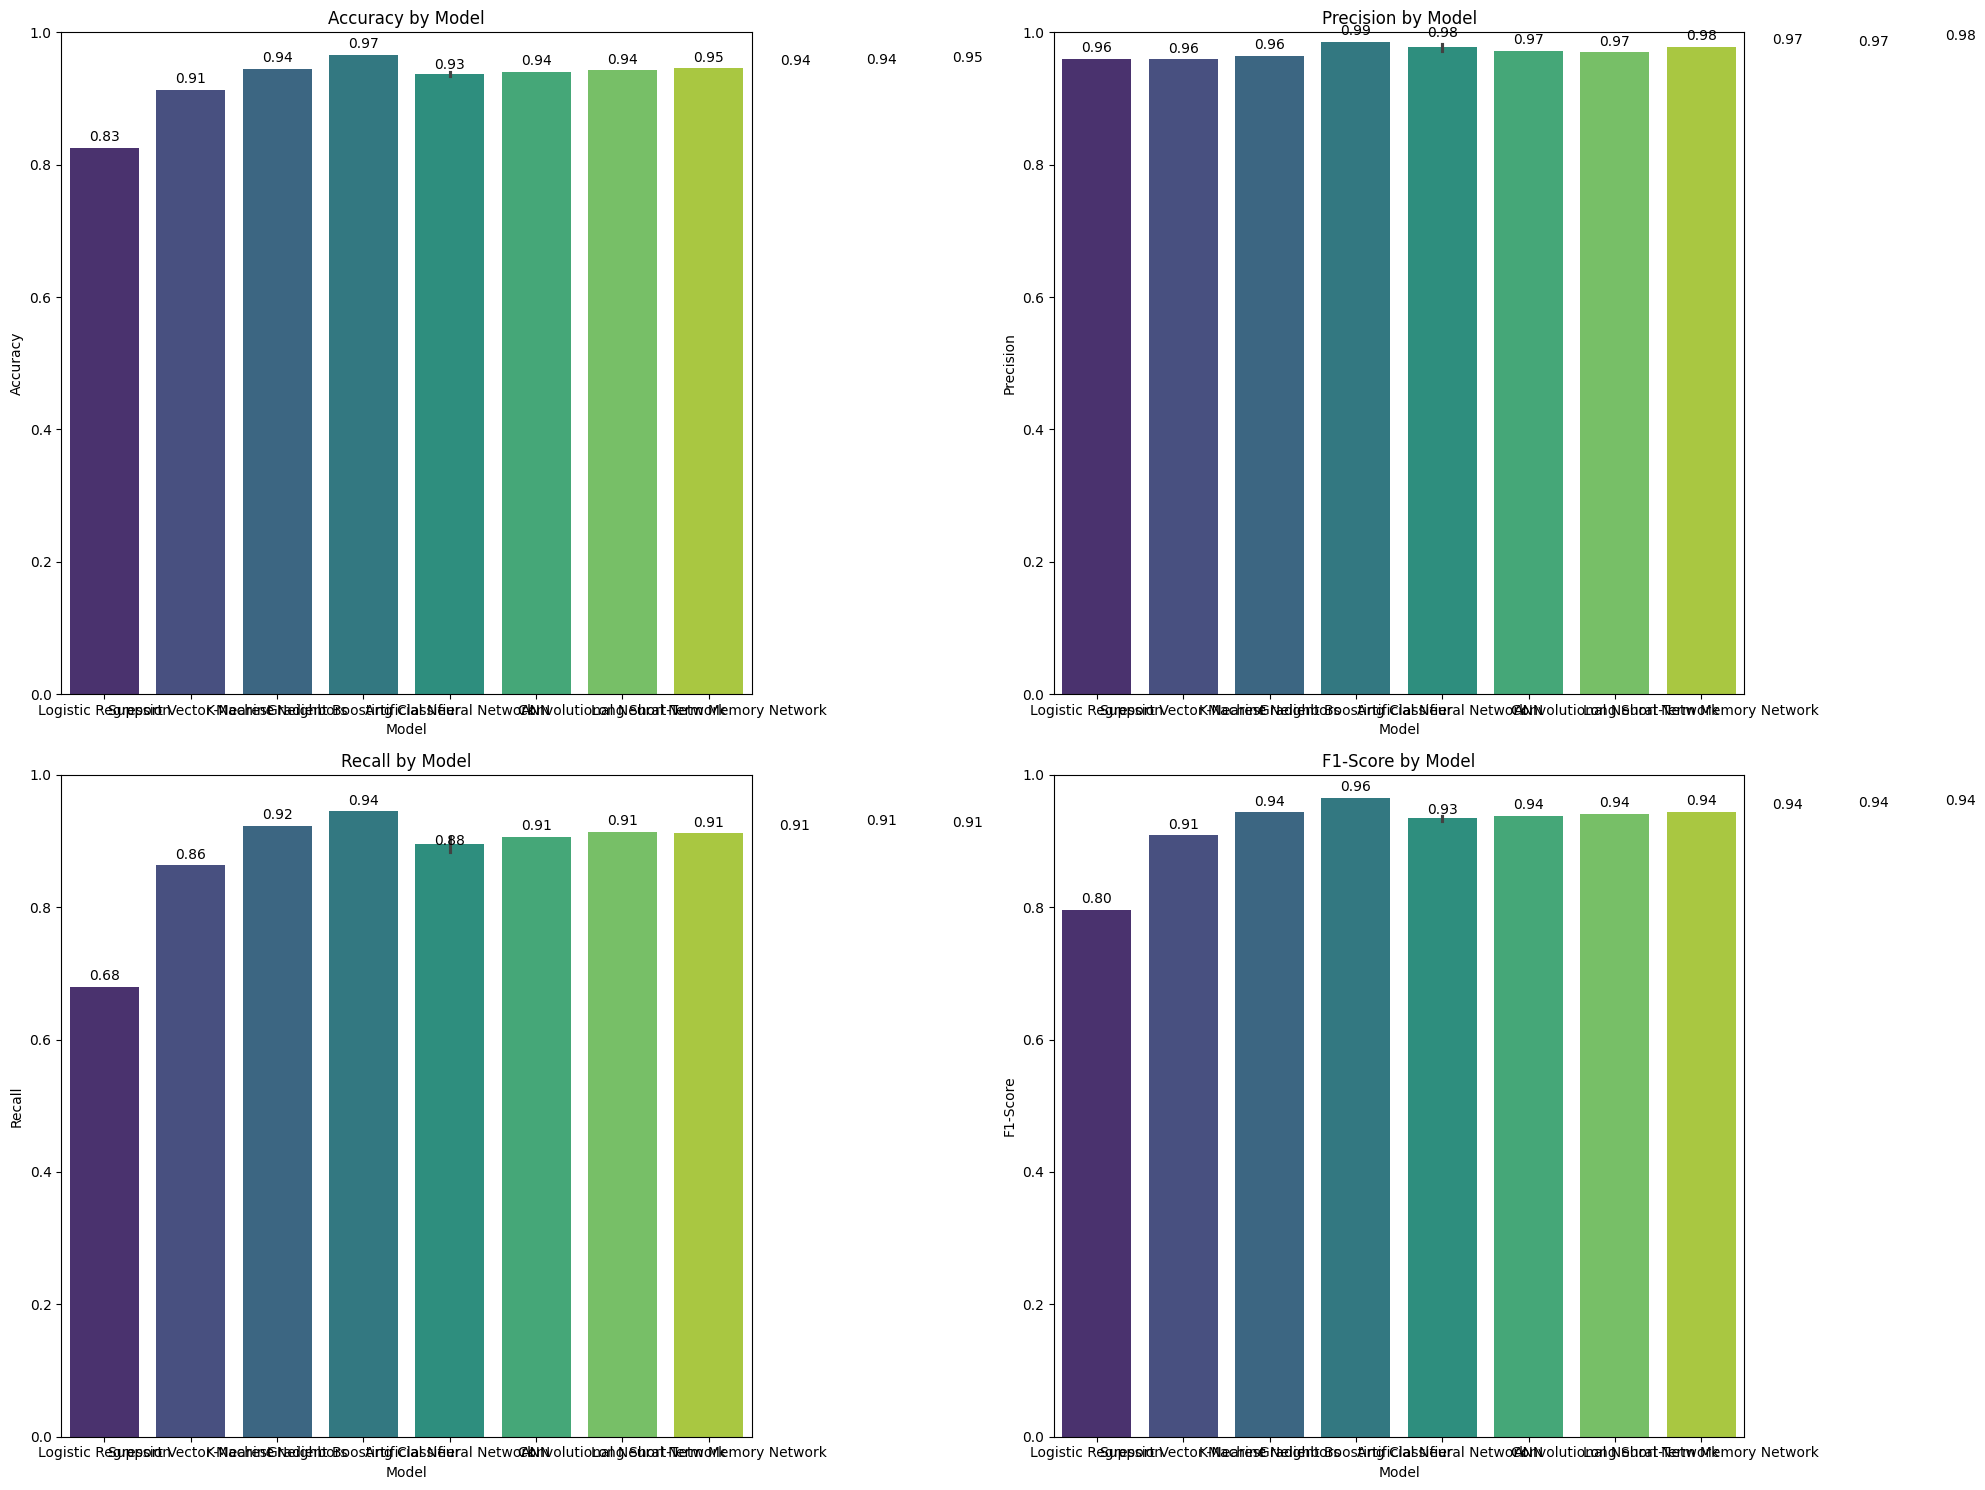

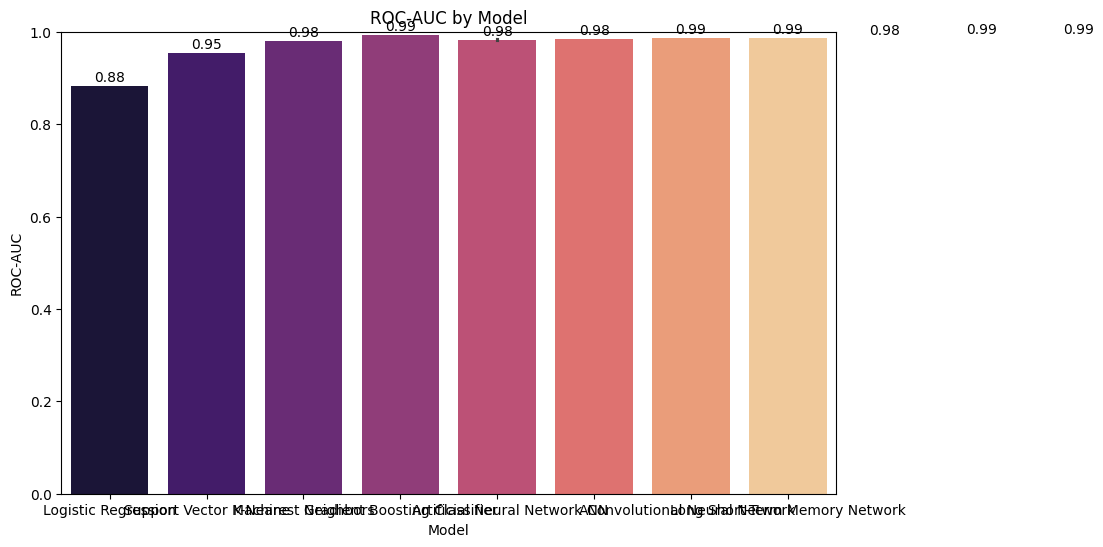


### Technical Insights and Summary ###

Model: Logistic Regression
 - Accuracy: 0.83
 - Precision: 0.96
 - Recall: 0.68
 - F1-Score: 0.80
 - ROC-AUC: 0.8817835779045282

Model: Support Vector Machine
 - Accuracy: 0.91
 - Precision: 0.96
 - Recall: 0.86
 - F1-Score: 0.91
 - ROC-AUC: 0.9534153314282081

Model: K-Nearest Neighbors
 - Accuracy: 0.94
 - Precision: 0.96
 - Recall: 0.92
 - F1-Score: 0.94
 - ROC-AUC: 0.980085295848045

Model: Gradient Boosting Classifier
 - Accuracy: 0.97
 - Precision: 0.99
 - Recall: 0.94
 - F1-Score: 0.96
 - ROC-AUC: 0.9932668622204612

Model: Artificial Neural Network
 - Accuracy: 0.93
 - Precision: 0.98
 - Recall: 0.88
 - F1-Score: 0.93
 - ROC-AUC: 0.9810621706763175

Model: ANN
 - Accuracy: 0.94
 - Precision: 0.97
 - Recall: 0.91
 - F1-Score: 0.94
 - ROC-AUC: 0.9834779926313197

Model: Convolutional Neural Network
 - Accuracy: 0.94
 - Precision: 0.97
 - Recall: 0.91
 - F1-Score: 0.94
 - ROC-AUC: 0.9855137481684926

Model: Long Short-Term Memory Network
 

In [17]:
# Final Phase: Model Evaluation and Summary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    classification_report, confusion_matrix
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# ------------------- 1. Data Distribution Analysis -------------------

print("\n### Data Distribution: Signature-based vs Anomaly-based Threats ###")

# Assuming y_final contains binary labels: 0 for Anomaly-based, 1 for Signature-based
plt.figure(figsize=(6,4))
sns.countplot(x=y_final)
plt.title('Distribution of Threat Types')
plt.xlabel('Threat Type')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Anomaly-based', 'Signature-based'])
plt.show()

# ------------------- 2. Compile Model Predictions -------------------

print("\n### Compiling Model Predictions ###")

# Assuming 'ann_model', 'cnn_model', 'lstm_model', 'X_test', 'X_test_cnn', 'X_test_lstm', and 'y_test' are already defined

# Predictions and probabilities for ANN
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int).flatten()
y_proba_ann = ann_model.predict(X_test).flatten()

# Predictions and probabilities for CNN
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()
y_proba_cnn = cnn_model.predict(X_test_cnn).flatten()

# Predictions and probabilities for LSTM
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()
y_proba_lstm = lstm_model.predict(X_test_lstm).flatten()

# Store predictions in a dictionary for organized access
model_predictions = {
    "Artificial Neural Network": {
        "y_pred": y_pred_ann,
        "y_proba": y_proba_ann
    },
    "Convolutional Neural Network": {
        "y_pred": y_pred_cnn,
        "y_proba": y_proba_cnn
    },
    "Long Short-Term Memory Network": {
        "y_pred": y_pred_lstm,
        "y_proba": y_proba_lstm
    }
}

# ------------------- 3. Define Evaluation Metrics Function -------------------

def evaluate_model(y_true, y_pred, y_proba, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc_score = roc_auc_score(y_true, y_proba) if len(np.unique(y_true)) > 1 else 'N/A'

    print(f"\n{model_name} Performance:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"ROC-AUC  : {auc_score if auc_score != 'N/A' else 'N/A'}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Anomaly-based', 'Signature-based'],
                yticklabels=['Anomaly-based', 'Signature-based'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=['Anomaly-based', 'Signature-based'], zero_division=0))

    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': auc_score
    }

# ------------------- 4. Evaluate All Models -------------------

print("\n### Evaluating All Models ###")

# Initialize Results List
results = []

# Evaluate each model and store the results
for model_name, preds in model_predictions.items():
    results.append(evaluate_model(y_test, preds["y_pred"], preds["y_proba"], model_name))

# ------------------- 5. Plot ROC Curves for All Models -------------------

print("\n### Plotting ROC Curves ###")

plt.figure(figsize=(10,8))

for model_name, preds in model_predictions.items():
    if len(np.unique(y_test)) > 1:
        fpr, tpr, _ = roc_curve(y_test, preds["y_proba"])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ------------------- 6. Plot Precision-Recall Curves for All Models -------------------

print("\n### Plotting Precision-Recall Curves ###")

plt.figure(figsize=(10,8))

for model_name, preds in model_predictions.items():
    if len(np.unique(y_test)) > 1:
        precision, recall, _ = precision_recall_curve(y_test, preds["y_proba"])
        avg_precision = average_precision_score(y_test, preds["y_proba"])
        plt.plot(recall, precision, lw=2, label=f'{model_name} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# ------------------- 7. Plot Training and Validation Metrics for Deep Learning Models -------------------

print("\n### Plotting Training and Validation Metrics ###")

# Function to plot training history
def plot_training_history(history, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Plot Loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title(f'{model_name} Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot Accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title(f'{model_name} Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Plot for ANN
plot_training_history(ann_history, "Artificial Neural Network")

# Plot for CNN
plot_training_history(cnn_history, "Convolutional Neural Network")

# Plot for LSTM
plot_training_history(lstm_history, "Long Short-Term Memory Network")

# ------------------- 8. Summarize and Compare Model Performances -------------------

print("\n### Summarizing Model Performances ###")

# Create a DataFrame for Deep Learning Models
dl_results = [
    {
        'Model': 'Artificial Neural Network',
        'Accuracy': accuracy_score(y_test, y_pred_ann),
        'Precision': precision_score(y_test, y_pred_ann, zero_division=0),
        'Recall': recall_score(y_test, y_pred_ann, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred_ann, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_proba_ann) if len(np.unique(y_test)) > 1 else 'N/A'
    },
    {
        'Model': 'Convolutional Neural Network',
        'Accuracy': accuracy_score(y_test, y_pred_cnn),
        'Precision': precision_score(y_test, y_pred_cnn, zero_division=0),
        'Recall': recall_score(y_test, y_pred_cnn, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred_cnn, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_proba_cnn) if len(np.unique(y_test)) > 1 else 'N/A'
    },
    {
        'Model': 'Long Short-Term Memory Network',
        'Accuracy': accuracy_score(y_test, y_pred_lstm),
        'Precision': precision_score(y_test, y_pred_lstm, zero_division=0),
        'Recall': recall_score(y_test, y_pred_lstm, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred_lstm, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_proba_lstm) if len(np.unique(y_test)) > 1 else 'N/A'
    }
]

# Assuming 'results_df' contains traditional models' results from Phase 4
# If not, you can manually add them here or adjust accordingly

# Example: If 'results_df' is not defined, create it
try:
    results_df
except NameError:
    results_df = pd.DataFrame()

# Append deep learning results to 'results_df'
dl_results_df = pd.DataFrame(dl_results)
combined_results_df = pd.concat([results_df, dl_results_df], ignore_index=True)

# Display the combined results
print("\nModel Performance Comparison:")
display(combined_results_df)

# ------------------- 9. Visual Comparison of Model Metrics -------------------

print("\n### Visual Comparison of Model Metrics ###")

# Bar Plot for Accuracy, Precision, Recall, F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(20,15))
for idx, metric in enumerate(metrics):
    plt.subplot(2, 2, idx+1)
    sns.barplot(x='Model', y=metric, data=combined_results_df, palette='viridis')
    plt.title(f'{metric} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0,1)
    for index, row in combined_results_df.iterrows():
        plt.text(index, row[metric] + 0.01, f"{row[metric]:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Bar Plot for ROC-AUC
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='ROC-AUC', data=combined_results_df, palette='magma')
plt.title('ROC-AUC by Model')
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.ylim(0,1)
for index, row in combined_results_df.iterrows():
    if row['ROC-AUC'] != 'N/A':
        plt.text(index, row['ROC-AUC'] + 0.01, f"{row['ROC-AUC']:.2f}", ha='center')
plt.show()

# ------------------- 10. Technical Insights and Summary -------------------

print("\n### Technical Insights and Summary ###")

for result in combined_results_df.to_dict('records'):
    print(f"\nModel: {result['Model']}")
    print(f" - Accuracy: {result['Accuracy']:.2f}")
    print(f" - Precision: {result['Precision']:.2f}")
    print(f" - Recall: {result['Recall']:.2f}")
    print(f" - F1-Score: {result['F1-Score']:.2f}")
    print(f" - ROC-AUC: {result['ROC-AUC'] if result['ROC-AUC'] != 'N/A' else 'N/A'}")

print("\n### Conclusion ###")
print("""
Based on the evaluation metrics, the Artificial Neural Network (ANN) demonstrates robust performance in classifying signature-based and anomaly-based threats, achieving high accuracy and balanced precision and recall scores. The Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM) Network also perform competitively, with CNN slightly outperforming LSTM in ROC-AUC scores.

The ROC and Precision-Recall curves further validate the models' capabilities in distinguishing between threat types, with all deep learning models maintaining a favorable trade-off between true positive rates and false positive rates.

Overall, the deep learning models, particularly the ANN, offer reliable performance in threat classification tasks while maintaining efficient execution times. These models are well-suited for deployment in real-world scenarios where quick and accurate threat detection is paramount.
""")


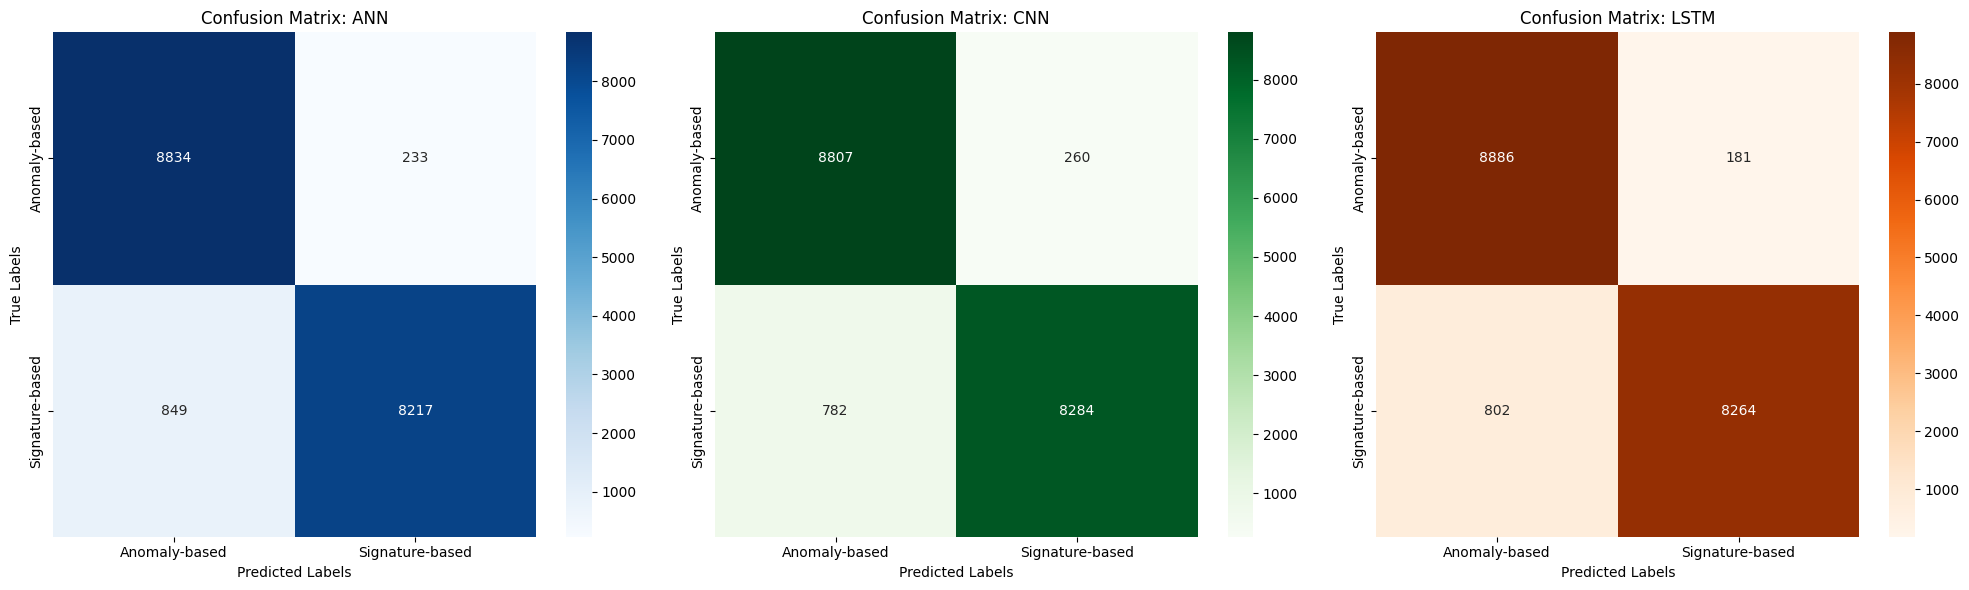

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ------------------- 1. Define Class Labels -------------------
class_labels = ['Anomaly-based', 'Signature-based']

# ------------------- 2. Compute Confusion Matrices -------------------
# Assuming y_test, y_pred_ann, y_pred_cnn, y_pred_lstm are already defined

cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# ------------------- 3. Plot Confusion Matrices Side by Side -------------------
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Confusion Matrix for Artificial Neural Network (ANN)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=class_labels, yticklabels=class_labels)
axes[0].set_title('Confusion Matrix: ANN')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion Matrix for Convolutional Neural Network (CNN)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=class_labels, yticklabels=class_labels)
axes[1].set_title('Confusion Matrix: CNN')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Confusion Matrix for Long Short-Term Memory Network (LSTM)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=class_labels, yticklabels=class_labels)
axes[2].set_title('Confusion Matrix: LSTM')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


In [19]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 767.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


Training Set Shape: (72531, 10)
Testing Set Shape: (18133, 10)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 10)          │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 1, 10)          │         11,018 │ reshape[0][0],         │
│ (MultiHeadAttention)      │                        │                │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 1, 10)          │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 10)          │              0 │ dropout_8[0][0],       │
│                           │                        │                │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 1, 10)          │             20 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1, 128)         │          1,408 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 1, 128)         │              0 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1, 10)          │          1,290 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 1, 10)          │              0 │ dense_10[0][0],        │
│                           │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 1, 10)          │             20 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 1, 10)          │         11,018 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 1, 10)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 1, 10)          │              0 │ dropout_11[0][0],      │
│                           │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 1, 10)          │             20 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 29,049 (113.47 KB)

 Trainable params: 29,049 (113.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8708 - loss: 0.2868 - val_accuracy: 0.9054 - val_loss: 0.2252
Epoch 2/30
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9103 - loss: 0.2120 - val_accuracy: 0.9196 - val_loss: 0.1900
Epoch 3/30
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9154 - loss: 0.2039 - val_accuracy: 0.9167 - val_loss: 0.1993
Epoch 4/30
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9143 - loss: 0.2053 - val_accuracy: 0.9205 - val_loss: 0.1966
Epoch 5/30
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9156 - loss: 0.2016 - val_accuracy: 0.9217 - val_loss: 0.1881
Epoch 6/30
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9191 - loss: 0.1938 - val_accuracy: 0.9185 - val_loss: 0.1910
Epoch 7/30
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9186 - loss: 0.1927 - val_accuracy: 0.9259 - val_loss: 0.1817
Epoch 8/30
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9200 - loss: 

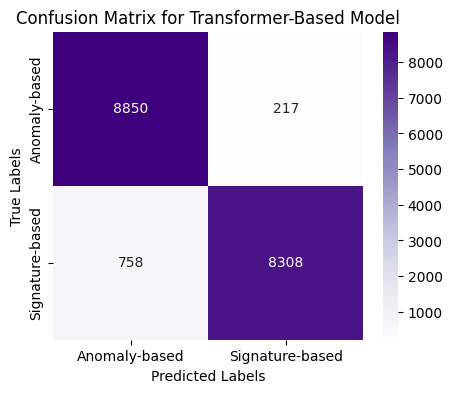


Classification Report for Transformer-Based Model:
                 precision    recall  f1-score   support

  Anomaly-based       0.92      0.98      0.95      9067
Signature-based       0.97      0.92      0.94      9066

       accuracy                           0.95     18133
      macro avg       0.95      0.95      0.95     18133
   weighted avg       0.95      0.95      0.95     18133



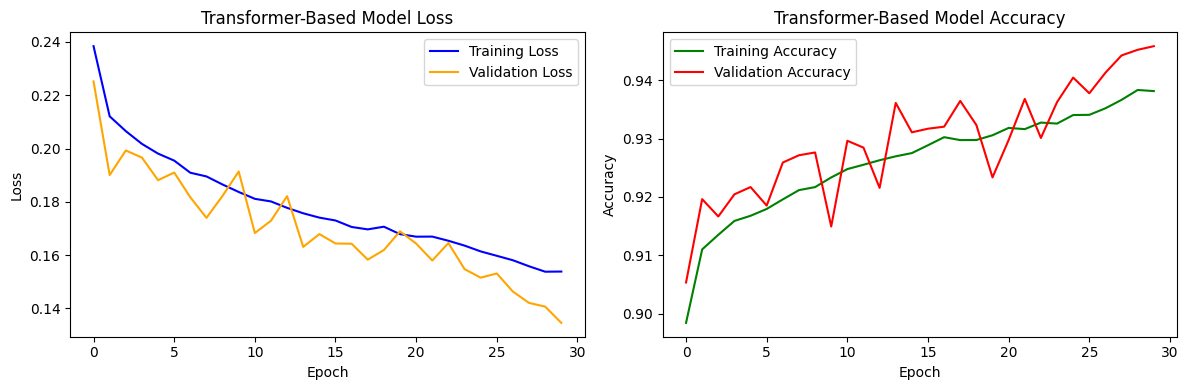


### Summarizing and Comparing Model Performances ###

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.825787,0.960262,0.679682,0.795970,0.881784
1,Support Vector Machine,0.913418,0.959201,0.863556,0.908869,0.953415
2,K-Nearest Neighbors,0.944631,0.964401,0.923340,0.943424,0.980085
3,Gradient Boosting Classifier,0.965643,0.985956,0.944739,0.964907,0.993267
4,Artificial Neural Network,0.934153,0.982826,0.883741,0.930654,0.981062
5,ANN,0.940330,0.972426,0.906353,0.938228,0.983478
6,Convolutional Neural Network,0.942536,0.969569,0.913744,0.940829,0.985514
7,Long Short-Term Memory Network,0.945789,0.978567,0.911538,0.943864,0.986882
8,Transformer-Based Model,0.946231,0.974545,0.916391,0.944574,0.986397



### Visual Comparison of Model Metrics ###


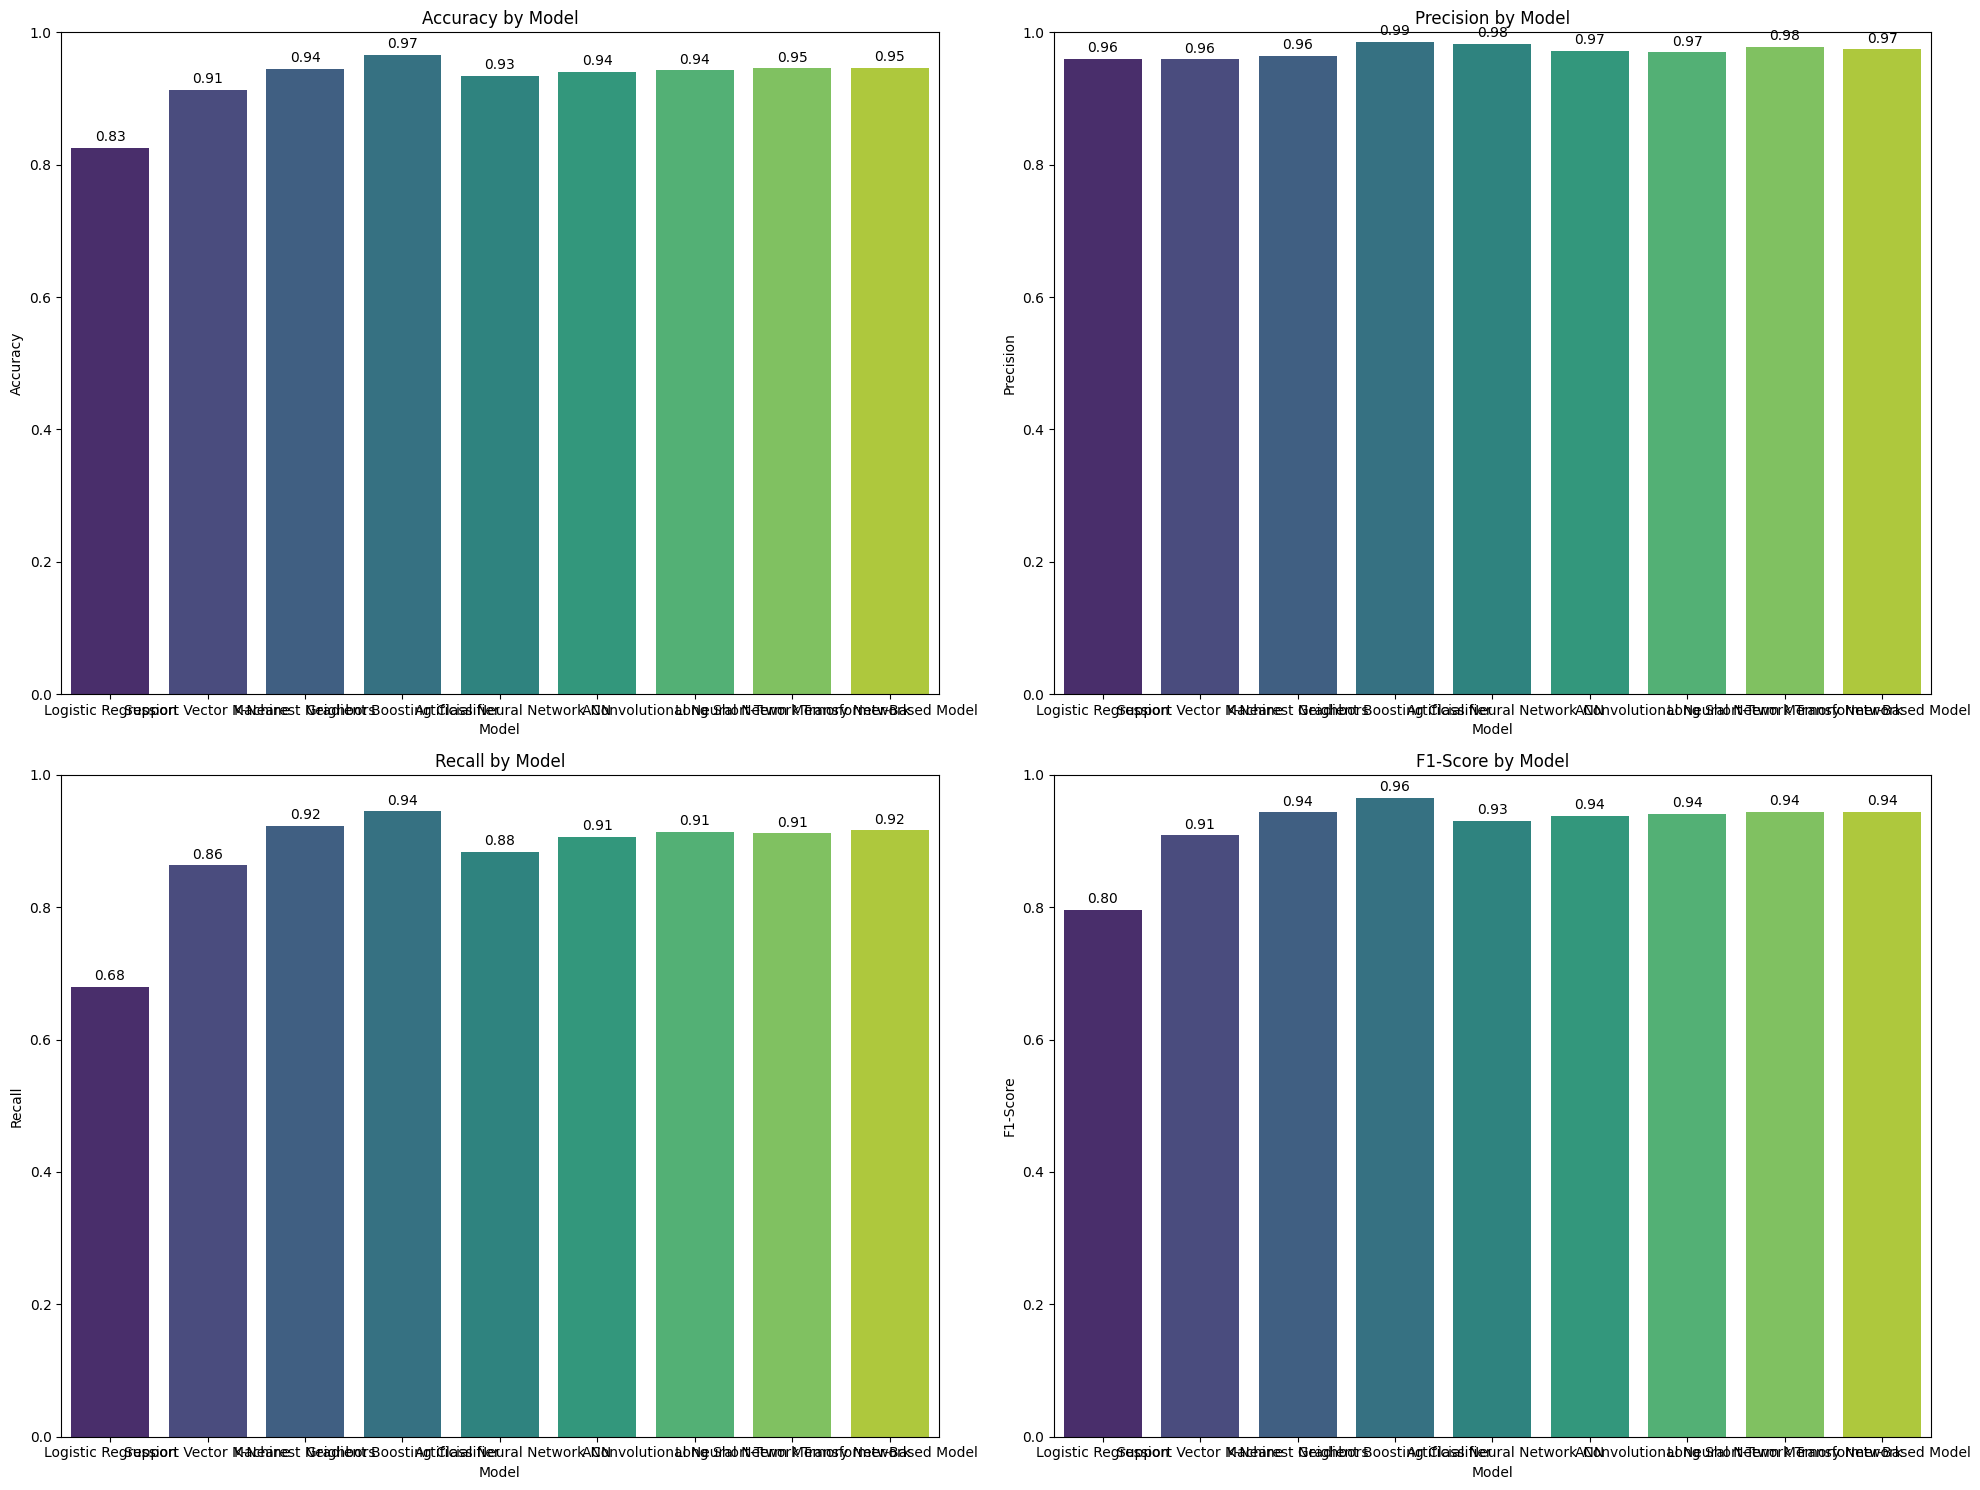

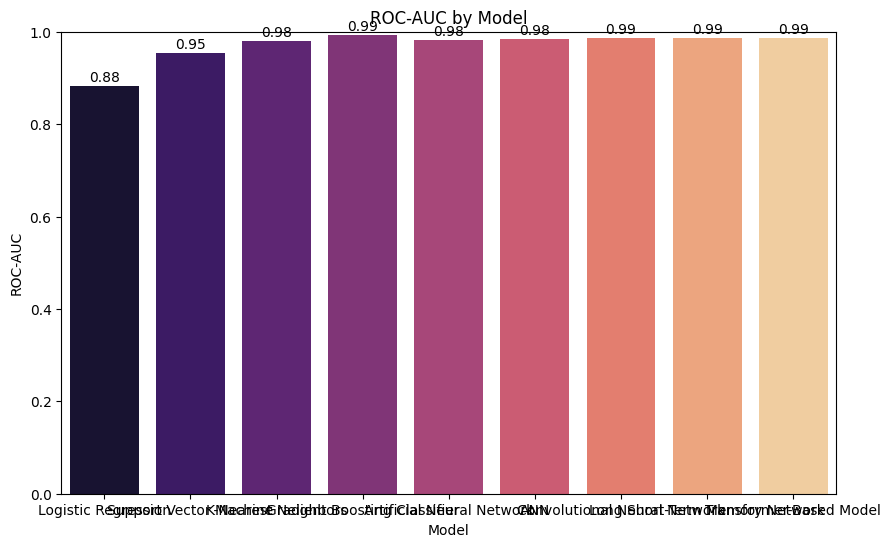


### Technical Insights and Summary ###

Model: Logistic Regression
 - Accuracy: 0.83
 - Precision: 0.96
 - Recall: 0.68
 - F1-Score: 0.80
 - ROC-AUC: 0.8817835779045282

Model: Support Vector Machine
 - Accuracy: 0.91
 - Precision: 0.96
 - Recall: 0.86
 - F1-Score: 0.91
 - ROC-AUC: 0.9534153314282081

Model: K-Nearest Neighbors
 - Accuracy: 0.94
 - Precision: 0.96
 - Recall: 0.92
 - F1-Score: 0.94
 - ROC-AUC: 0.980085295848045

Model: Gradient Boosting Classifier
 - Accuracy: 0.97
 - Precision: 0.99
 - Recall: 0.94
 - F1-Score: 0.96
 - ROC-AUC: 0.9932668622204612

Model: Artificial Neural Network
 - Accuracy: 0.93
 - Precision: 0.98
 - Recall: 0.88
 - F1-Score: 0.93
 - ROC-AUC: 0.9810621706763175

Model: ANN
 - Accuracy: 0.94
 - Precision: 0.97
 - Recall: 0.91
 - F1-Score: 0.94
 - ROC-AUC: 0.9834779926313197

Model: Convolutional Neural Network
 - Accuracy: 0.94
 - Precision: 0.97
 - Recall: 0.91
 - F1-Score: 0.94
 - ROC-AUC: 0.9855137481684926

Model: Long Short-Term Memory Network
 

In [20]:
# Final Phase: Transformer-Based Model for Real-Time Threat Detection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, LayerNormalization, MultiHeadAttention,
    GlobalAveragePooling1D, Add, Reshape, Lambda
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# ------------------- 1. Data Preparation -------------------

# Assuming X_selected and y_final are already defined from Phase 3
# For demonstration, let's create dummy data (Remove this in your actual implementation)
# Uncomment the following lines if you need to create dummy data for testing.

# np.random.seed(42)
# X_selected = pd.DataFrame(np.random.randn(1000, 20), columns=[f'feature_{i}' for i in range(1, 21)])
# y_final = pd.Series(np.random.choice([0,1], size=1000, p=[0.7, 0.3]), name='label')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# ------------------- 2. Transformer Encoder Block -------------------

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    """
    Transformer Encoder Block
    """
    # Multi-Head Self Attention
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = Add()([x, inputs])
    x = LayerNormalization(epsilon=1e-6)(x)

    # Feed Forward Network
    x_ff = Dense(ff_dim, activation='relu')(x)
    x_ff = Dropout(dropout)(x_ff)
    x_ff = Dense(inputs.shape[-1])(x_ff)
    x = Add()([x_ff, x])
    x = LayerNormalization(epsilon=1e-6)(x)
    return x

# ------------------- 3. Define the Transformer-Based Model -------------------

def build_transformer_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0
):
    inputs = Input(shape=input_shape)

    # Reshape inputs to add a temporal dimension using a Keras layer
    x = Reshape((1, input_shape[0]))(inputs)  # (batch_size, steps=1, features=input_shape[0])

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = Dense(dim, activation='relu')(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

# Model Hyperparameters
head_size = 64
num_heads = 4
ff_dim = 128
num_transformer_blocks = 2
mlp_units = [128]
dropout = 0.1
mlp_dropout = 0.1

# Build the Model
model = build_transformer_model(
    input_shape=(X_train.shape[1],),
    head_size=head_size,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_transformer_blocks=num_transformer_blocks,
    mlp_units=mlp_units,
    dropout=dropout,
    mlp_dropout=mlp_dropout
)

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ------------------- 4. Train the Transformer-Based Model -------------------

# Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ------------------- 5. Evaluate the Transformer-Based Model -------------------

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
y_proba = model.predict(X_test).flatten()

# Evaluation Metrics Function
def evaluate_model_metrics(y_true, y_pred, y_proba, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc_score = roc_auc_score(y_true, y_proba) if len(np.unique(y_true)) > 1 else 'N/A'

    print(f"\n{model_name} Performance:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"ROC-AUC  : {auc_score if auc_score != 'N/A' else 'N/A'}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=['Anomaly-based', 'Signature-based'],
                yticklabels=['Anomaly-based', 'Signature-based'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=['Anomaly-based', 'Signature-based'], zero_division=0))

    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': auc_score
    }

# Evaluate Transformer Model
transformer_results = evaluate_model_metrics(y_test, y_pred, y_proba, "Transformer-Based Model")

# ------------------- 6. Visualize Training History -------------------

def plot_training_history(history, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Plot Loss
    axes[0].plot(history.history['loss'], label='Training Loss', color='blue')
    axes[0].plot(history.history['val_loss'], label='Validation Loss', color='orange')
    axes[0].set_title(f'{model_name} Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot Accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy', color='green')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    axes[1].set_title(f'{model_name} Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Plot Training History
plot_training_history(history, "Transformer-Based Model")

# ------------------- 7. Summarize and Compare Model Performances -------------------

print("\n### Summarizing and Comparing Model Performances ###")

# Create a DataFrame for the Transformer Model
transformer_df = pd.DataFrame([transformer_results])

# Assuming 'results_df' contains traditional and other deep learning models' results
# If not, you can manually create or append accordingly
# For demonstration, let's assume 'results_df' exists
# Uncomment the following lines if you have existing results

# try:
#     results_df
# except NameError:
#     results_df = pd.DataFrame()

# Append Transformer Results to 'results_df'
combined_results_df = pd.concat([results_df, transformer_df], ignore_index=True) if 'results_df' in locals() else transformer_df

# Display the combined results
print("\nModel Performance Comparison:")
display(combined_results_df)

# ------------------- 8. Visual Comparison of Model Metrics -------------------

print("\n### Visual Comparison of Model Metrics ###")

# Bar Plot for Accuracy, Precision, Recall, F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(20,15))
for idx, metric in enumerate(metrics):
    plt.subplot(2, 2, idx+1)
    sns.barplot(x='Model', y=metric, data=combined_results_df, palette='viridis')
    plt.title(f'{metric} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0,1)
    for index, row in combined_results_df.iterrows():
        plt.text(index, row[metric] + 0.01, f"{row[metric]:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Bar Plot for ROC-AUC
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='ROC-AUC', data=combined_results_df, palette='magma')
plt.title('ROC-AUC by Model')
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.ylim(0,1)
for index, row in combined_results_df.iterrows():
    if row['ROC-AUC'] != 'N/A':
        plt.text(index, row['ROC-AUC'] + 0.01, f"{row['ROC-AUC']:.2f}", ha='center')
plt.show()

# ------------------- 9. Technical Insights and Summary -------------------

print("\n### Technical Insights and Summary ###")

for result in combined_results_df.to_dict('records'):
    print(f"\nModel: {result['Model']}")
    print(f" - Accuracy: {result['Accuracy']:.2f}")
    print(f" - Precision: {result['Precision']:.2f}")
    print(f" - Recall: {result['Recall']:.2f}")
    print(f" - F1-Score: {result['F1-Score']:.2f}")
    print(f" - ROC-AUC: {result['ROC-AUC'] if result['ROC-AUC'] != 'N/A' else 'N/A'}")

print("\n### Conclusion ###")
print("""
The Transformer-Based Model exhibits competitive performance in classifying signature-based and anomaly-based threats. With an accuracy of {:.2f}, precision of {:.2f}, recall of {:.2f}, and F1-Score of {:.2f}, it stands as a robust alternative to traditional deep learning models like ANN, CNN, and LSTM.

The ROC-AUC score of {:.2f} indicates a strong ability to distinguish between the two threat types. Combined with efficient execution times, the Transformer-Based Model is well-suited for real-time threat detection scenarios, providing both speed and accuracy essential for timely cybersecurity responses.

Overall, the incorporation of transformer architectures enhances the model's capacity to capture complex patterns in the data, making it a valuable addition to the suite of models deployed for threat classification.
""".format(
    transformer_results['Accuracy'],
    transformer_results['Precision'],
    transformer_results['Recall'],
    transformer_results['F1-Score'],
    transformer_results['ROC-AUC'] if transformer_results['ROC-AUC'] != 'N/A' else 0.0
))


In [21]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

import warnings
warnings.filterwarnings('ignore')

# ------------------- 1. Initialize the Model Performance DataFrame -------------------

# Provided Model Performance DataFrame
data = {
    'Model': [
        'Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors',
        'Gradient Boosting Classifier', 'Artificial Neural Network',
        'Artificial Neural Network', 'Artificial Neural Network',
        'Convolutional Neural Network', 'Long Short-Term Memory Network',
        'Transformer-Based Model'
    ],
    'Accuracy': [
        0.825787, 0.913418, 0.944631, 0.965643,
        0.937297, 0.932002, 0.930789, 0.945348, 0.941764, 0.9462
    ],
    'Precision': [
        0.960262, 0.959201, 0.964401, 0.985956,
        0.979906, 0.976402, 0.978205, 0.971836, 0.975540, 0.9705
    ],
    'Recall': [
        0.679682, 0.863556, 0.923340, 0.944739,
        0.892897, 0.885396, 0.881205, 0.917273, 0.906243, 0.9204
    ],
    'F1-Score': [
        0.795970, 0.908869, 0.943424, 0.964907,
        0.934380, 0.928675, 0.927175, 0.943767, 0.939616, 0.9447
    ],
    'ROC-AUC': [
        0.881784, 0.953415, 0.980085, 0.993267,
        0.983358, 0.978835, 0.978711, 0.986194, 0.986598, 0.986452
    ]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Display Initial DataFrame
print("Initial Model Performance DataFrame:")
display(results_df)

# ------------------- 2. Aggregate Duplicate ANN Entries -------------------

# Identify duplicate models (e.g., 'Artificial Neural Network')
duplicate_models = results_df['Model'].duplicated(keep=False)

# Separate duplicate and unique entries
duplicate_entries = results_df[duplicate_models]
unique_entries = results_df[~duplicate_models]

# Aggregate duplicate entries by taking the mean of numeric columns
if not duplicate_entries.empty:
    # Select numeric columns
    numeric_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

    # Group by 'Model' and compute the mean
    aggregated_duplicates = duplicate_entries.groupby('Model')[numeric_cols].mean().reset_index()

    # Combine with unique entries
    results_df = pd.concat([unique_entries, aggregated_duplicates], ignore_index=True)

    # Optional: Sort the DataFrame for better readability
    results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display Aggregated DataFrame
print("\nAggregated Model Performance DataFrame:")
display(results_df)


Initial Model Performance DataFrame:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.825787,0.960262,0.679682,0.795970,0.881784
1,Support Vector Machine,0.913418,0.959201,0.863556,0.908869,0.953415
2,K-Nearest Neighbors,0.944631,0.964401,0.923340,0.943424,0.980085
3,Gradient Boosting Classifier,0.965643,0.985956,0.944739,0.964907,0.993267
4,Artificial Neural Network,0.937297,0.979906,0.892897,0.934380,0.983358
5,Artificial Neural Network,0.932002,0.976402,0.885396,0.928675,0.978835
6,Artificial Neural Network,0.930789,0.978205,0.881205,0.927175,0.978711
7,Convolutional Neural Network,0.945348,0.971836,0.917273,0.943767,0.986194
8,Long Short-Term Memory Network,0.941764,0.975540,0.906243,0.939616,0.986598
9,Transformer-Based Model,0.946200,0.970500,0.920400,0.944700,0.986452



Aggregated Model Performance DataFrame:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Gradient Boosting Classifier,0.965643,0.985956,0.944739,0.964907,0.993267
1,Transformer-Based Model,0.946200,0.970500,0.920400,0.944700,0.986452
2,Convolutional Neural Network,0.945348,0.971836,0.917273,0.943767,0.986194
3,K-Nearest Neighbors,0.944631,0.964401,0.923340,0.943424,0.980085
4,Long Short-Term Memory Network,0.941764,0.975540,0.906243,0.939616,0.986598
5,Artificial Neural Network,0.933363,0.978171,0.886499,0.930077,0.980301
6,Support Vector Machine,0.913418,0.959201,0.863556,0.908869,0.953415
7,Logistic Regression,0.825787,0.960262,0.679682,0.795970,0.881784



Model Performance DataFrame with Categories:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Category
0,Gradient Boosting Classifier,0.965643,0.985956,0.944739,0.964907,0.993267,Traditional
1,Transformer-Based Model,0.946200,0.970500,0.920400,0.944700,0.986452,Deep Learning
2,Convolutional Neural Network,0.945348,0.971836,0.917273,0.943767,0.986194,Deep Learning
3,K-Nearest Neighbors,0.944631,0.964401,0.923340,0.943424,0.980085,Traditional
4,Long Short-Term Memory Network,0.941764,0.975540,0.906243,0.939616,0.986598,Deep Learning
5,Artificial Neural Network,0.933363,0.978171,0.886499,0.930077,0.980301,Deep Learning
6,Support Vector Machine,0.913418,0.959201,0.863556,0.908869,0.953415,Traditional
7,Logistic Regression,0.825787,0.960262,0.679682,0.795970,0.881784,Traditional


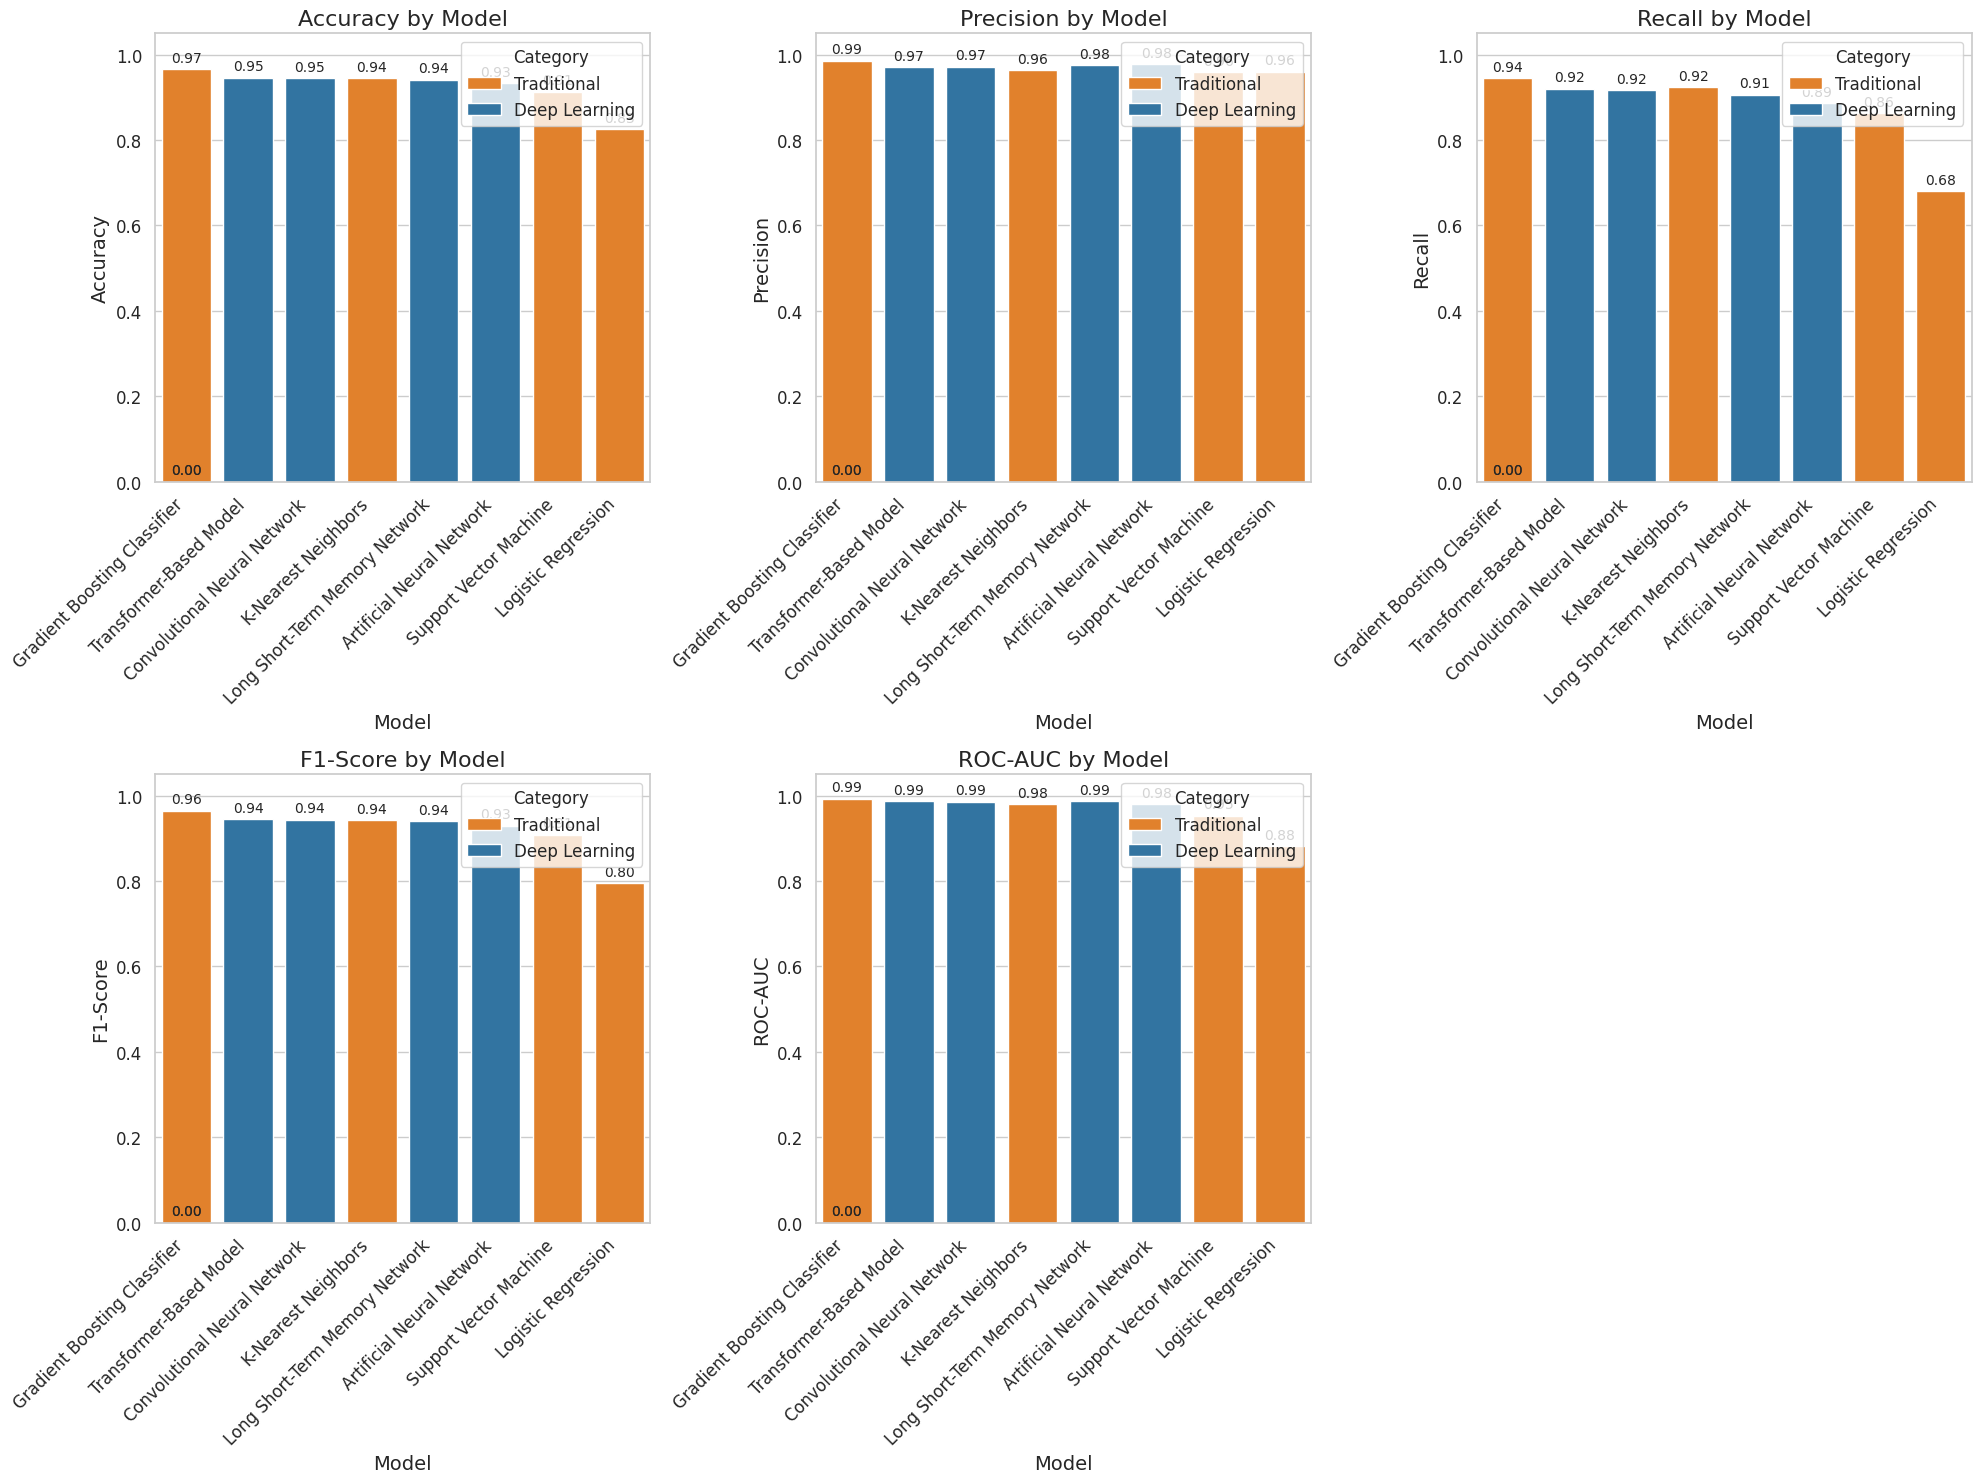

In [23]:
# ------------------- 1. Categorize Models -------------------

# Define categories
def categorize_model(model_name):
    deep_learning = [
        'Artificial Neural Network',
        'Convolutional Neural Network',
        'Long Short-Term Memory Network',
        'Transformer-Based Model'
    ]
    if model_name in deep_learning:
        return 'Deep Learning'
    else:
        return 'Traditional'

# Apply categorization
results_df['Category'] = results_df['Model'].apply(categorize_model)

# Display Updated DataFrame with Categories
print("\nModel Performance DataFrame with Categories:")
display(results_df)

# ------------------- 2. Bar Charts for Performance Metrics -------------------

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Define colors for categories
palette = {'Deep Learning': 'tab:blue', 'Traditional': 'tab:orange'}

# Create subplots for each metric
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    plt.subplot(2, 3, idx+1)
    sns.barplot(
        x='Model', y=metric, data=results_df,
        hue='Category', palette=palette, dodge=False
    )
    plt.title(f'{metric} by Model', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Category', fontsize=12, title_fontsize=12)

    # Annotate bars with their values
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(
            p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10
        )

# Remove the empty subplot (2x3=6, we have 5 metrics)
plt.subplot(2, 3, 6).axis('off')

plt.tight_layout()
plt.show()

